Step-by-Step Dataset Preparation
1. AI Global Index Data (AI_index_db.csv)

In [8]:
import pandas as pd
# Load the AI Global Index dataset
ai_data = pd.read_csv('./AI_index_db.csv')

# Display the first few rows to inspect the structure
print(ai_data.head())

                    Country  Talent  Infrastructure  Operating Environment  \
0  United States of America  100.00           94.02                  64.56   
1                     China   16.51          100.00                  91.57   
2            United Kingdom   39.65           71.43                  74.65   
3                    Canada   31.28           77.05                  93.94   
4                    Israel   35.76           67.58                  82.44   

   Research  Development  Government Strategy  Commercial  Total score  \
0    100.00       100.00                77.39      100.00       100.00   
1     71.42        79.97                94.87       44.02        62.92   
2     36.50        25.03                82.82       18.91        40.93   
3     30.67        25.78               100.00       14.88        40.19   
4     32.63        27.96                43.91       27.33        39.89   

         Region                Cluster  Income group   Political regime  
0      Ameri

In [20]:
# Check for missing values in AI data
print(ai_data.isnull().sum())

Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64


In [22]:
# Drop rows with missing values (if there are many missing values):
ai_data_cleaned = ai_data.dropna()

# Alternatively, fill missing values (if only a few are missing):
# ai_data_cleaned = ai_data.fillna(method='ffill')

1.4 Select Relevant Columns(Once the data is clean, select only the relevant columns for the analysis (e.g., Talent, Infrastructure, etc.)

In [26]:
# Select relevant columns for analysis
ai_data_cleaned = ai_data_cleaned[['Country', 'Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial']]

Part 2: Cleaning the Unemployment Data

In [15]:
# Correct the file path and remove any special characters
unemployment_data = pd.read_csv('./API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_3401869.csv', skiprows=4)

# Display the first few rows of the unemployment data to check the structure
unemployment_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.880312,7.027630,7.123032,7.068440,7.244670,7.661161,7.964493,7.448222,7.472824,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.011000,10.100000,11.184000,11.206000,11.224000,11.710000,11.934000,14.100000,14.386000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.204562,4.139948,4.204170,4.224167,4.247944,4.697497,4.524016,3.737766,3.397782,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.491000,16.580000,16.617000,16.599000,16.497000,16.676000,15.799000,14.693000,14.620000,NaN


Step-by-Step for Unemployment Data Cleaning:
Step 1: Select Unemployment Rates for 2020 and 2021

2.2 Select Relevant Years (2020, 2021, 2022, 2023)

In [31]:
# Select unemployment rates for 2020 to 2023
unemployment_cleaned = unemployment_data[['Country Name', '2020', '2021', '2022', '2023']]

2.3 Check for Missing Values

In [34]:
# Check for missing values
print(unemployment_cleaned.isnull().sum())

Country Name     0
2020            31
2021            31
2022            32
2023            33
dtype: int64


2.4 Handle Missing Values

In [37]:
# Drop rows with missing values
unemployment_cleaned = unemployment_cleaned.dropna()

# Alternatively, fill missing values (optional)
# unemployment_cleaned = unemployment_cleaned.fillna(method='ffill')

Part 3: Merging the Datasets

3.1 Prepare for Merging
Before merging, rename the Country Name column in the unemployment data to match the Country column in the AI data.

In [41]:
# Rename 'Country Name' to 'Country' in the unemployment data
unemployment_cleaned.rename(columns={'Country Name': 'Country'}, inplace=True)

3.2 Merge the Datasets

Now, merge the two cleaned datasets on the Country column.

In [45]:
# Merge AI data with unemployment data on 'Country'
merged_data = pd.merge(ai_data_cleaned, unemployment_cleaned, on='Country')

# Display the first few rows of the merged dataset
print(merged_data.head())

          Country  Talent  Infrastructure  Operating Environment  Research  \
0           China   16.51          100.00                  91.57     71.42   
1  United Kingdom   39.65           71.43                  74.65     36.50   
2          Canada   31.28           77.05                  93.94     30.67   
3          Israel   35.76           67.58                  82.44     32.63   
4       Singapore   39.38           84.30                  43.15     37.67   

   Development  Government Strategy  Commercial   2020   2021   2022   2023  
0        79.97                94.87       44.02  5.000  4.550  4.980  4.670  
1        25.03                82.82       18.91  4.472  4.826  3.730  4.055  
2        25.78               100.00       14.88  9.657  7.527  5.280  5.366  
3        27.96                43.91       27.33  4.169  4.812  3.695  3.389  
4        22.55                79.82       15.07  4.100  4.640  3.591  3.472  


In [47]:
# Save the cleaned and merged dataset
merged_data.to_csv('cleaned_merged_data.csv', index=False)

In [49]:
# Load the cleaned merged data
import pandas as pd

merged_data = pd.read_csv('cleaned_merged_data.csv')

# Display the first few rows of the dataset
print(merged_data.head())

          Country  Talent  Infrastructure  Operating Environment  Research  \
0           China   16.51          100.00                  91.57     71.42   
1  United Kingdom   39.65           71.43                  74.65     36.50   
2          Canada   31.28           77.05                  93.94     30.67   
3          Israel   35.76           67.58                  82.44     32.63   
4       Singapore   39.38           84.30                  43.15     37.67   

   Development  Government Strategy  Commercial   2020   2021   2022   2023  
0        79.97                94.87       44.02  5.000  4.550  4.980  4.670  
1        25.03                82.82       18.91  4.472  4.826  3.730  4.055  
2        25.78               100.00       14.88  9.657  7.527  5.280  5.366  
3        27.96                43.91       27.33  4.169  4.812  3.695  3.389  
4        22.55                79.82       15.07  4.100  4.640  3.591  3.472  


In [51]:
# Generate descriptive statistics for the dataset
print(merged_data.describe())

          Talent  Infrastructure  Operating Environment   Research  \
count  51.000000       51.000000              51.000000  51.000000   
mean   15.989412       62.244510              68.456078  15.261176   
std    11.230259       20.321018              18.733382  14.332886   
min     0.000000        0.000000              12.480000   0.000000   
25%     6.985000       55.795000              58.415000   2.875000   
50%    14.210000       65.100000              70.750000  12.230000   
75%    25.210000       73.700000              80.665000  23.035000   
max    45.270000      100.000000             100.000000  71.420000   

       Development  Government Strategy  Commercial       2020       2021  \
count    51.000000            51.000000   51.000000  51.000000  51.000000   
mean     12.896275            56.125098    5.080000   7.404667   7.023275   
std      14.425785            27.653852    7.690671   4.509614   4.613133   
min       0.000000             0.000000    0.000000   0.14000

Step 3: Visualize the Distribution of AI Indicators

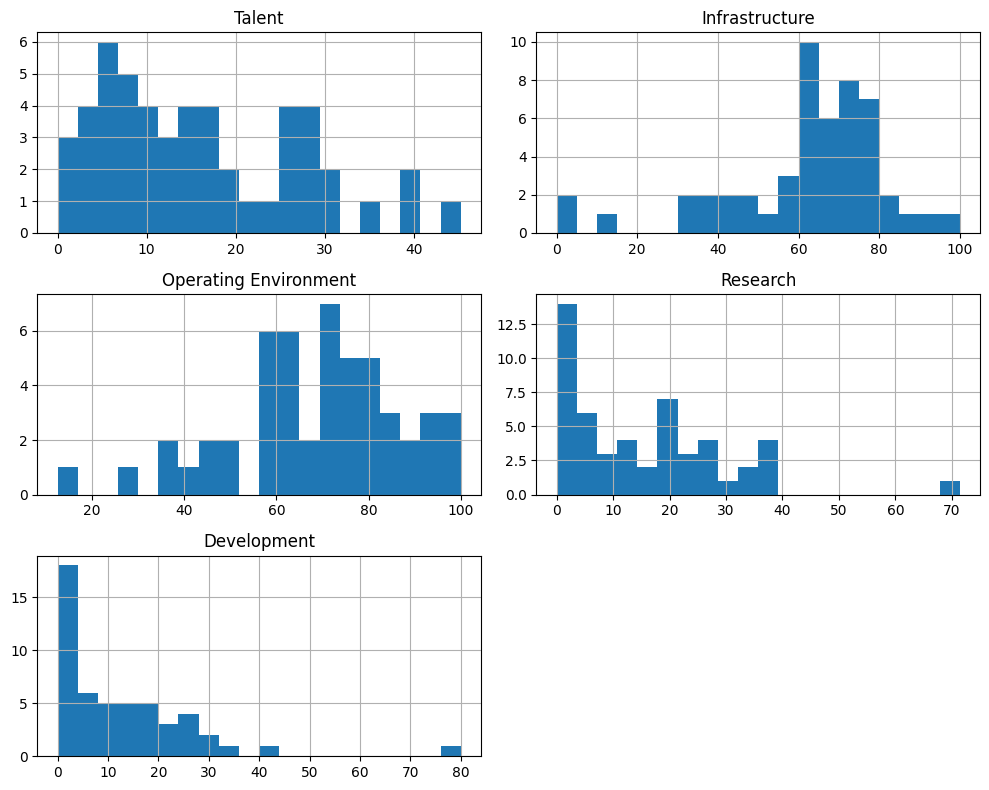

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for AI indicators
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']
merged_data[ai_columns].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

Updated Code with Labeled Axes:

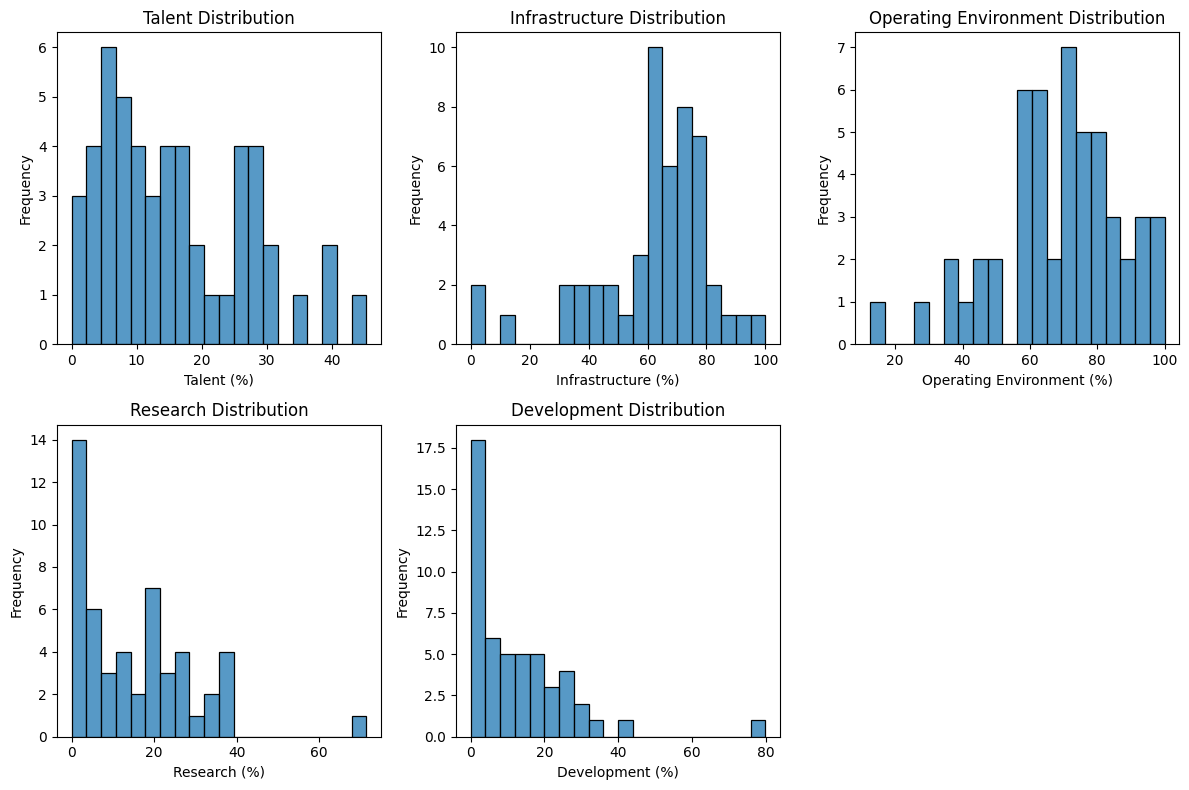

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for AI indicators with labels and units
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']
units = {
    'Talent': '%',
    'Infrastructure': '%',
    'Operating Environment': '%',
    'Research': '%',
    'Development': '%'
}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # Adjust rows/cols based on the number of columns
axes = axes.flatten()

# Loop through each AI indicator and plot the histogram with labels
for i, column in enumerate(ai_columns):
    sns.histplot(merged_data[column], bins=20, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(f'{column} ({units[column]})')
    axes[i].set_ylabel('Frequency')

# Hide the last subplot if it's empty (in case of an odd number of plots)
if len(ai_columns) % 3 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

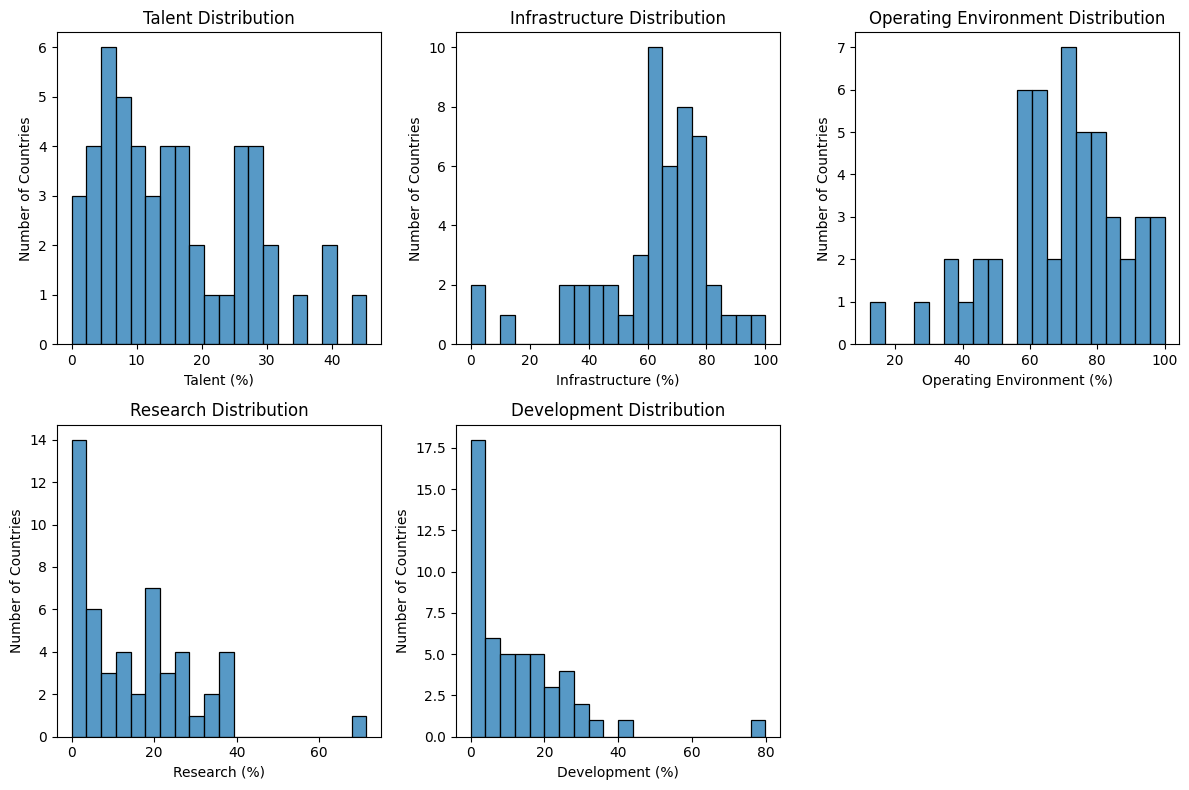

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for AI indicators with labels and units
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']
units = {
    'Talent': '%',
    'Infrastructure': '%',
    'Operating Environment': '%',
    'Research': '%',
    'Development': '%'
}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # Adjust rows/cols based on the number of columns
axes = axes.flatten()

# Loop through each AI indicator and plot the histogram with labels
for i, column in enumerate(ai_columns):
    sns.histplot(merged_data[column], bins=20, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(f'{column} ({units[column]})')
    axes[i].set_ylabel('Number of Countries')

# Hide the last subplot if it's empty (in case of an odd number of plots)
if len(ai_columns) % 3 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Step: Correlation Analysis

 1. Correlation Matrix

In [63]:
# Correlation matrix for AI indicators and unemployment rates
correlation_matrix = merged_data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', '2020', '2021', '2022', '2023']].corr()

# Display the correlation matrix
print(correlation_matrix)

                         Talent  Infrastructure  Operating Environment  \
Talent                 1.000000        0.458735               0.153944   
Infrastructure         0.458735        1.000000               0.437003   
Operating Environment  0.153944        0.437003               1.000000   
Research               0.672064        0.619268               0.252146   
Development            0.543991        0.494737               0.203177   
2020                  -0.201882       -0.231598               0.037123   
2021                  -0.183997       -0.222655              -0.011598   
2022                  -0.223741       -0.231634              -0.035365   
2023                  -0.203459       -0.209638              -0.038729   

                       Research  Development      2020      2021      2022  \
Talent                 0.672064     0.543991 -0.201882 -0.183997 -0.223741   
Infrastructure         0.619268     0.494737 -0.231598 -0.222655 -0.231634   
Operating Environment  0.

2. Visualizing the Correlation Matrix (Heatmap)

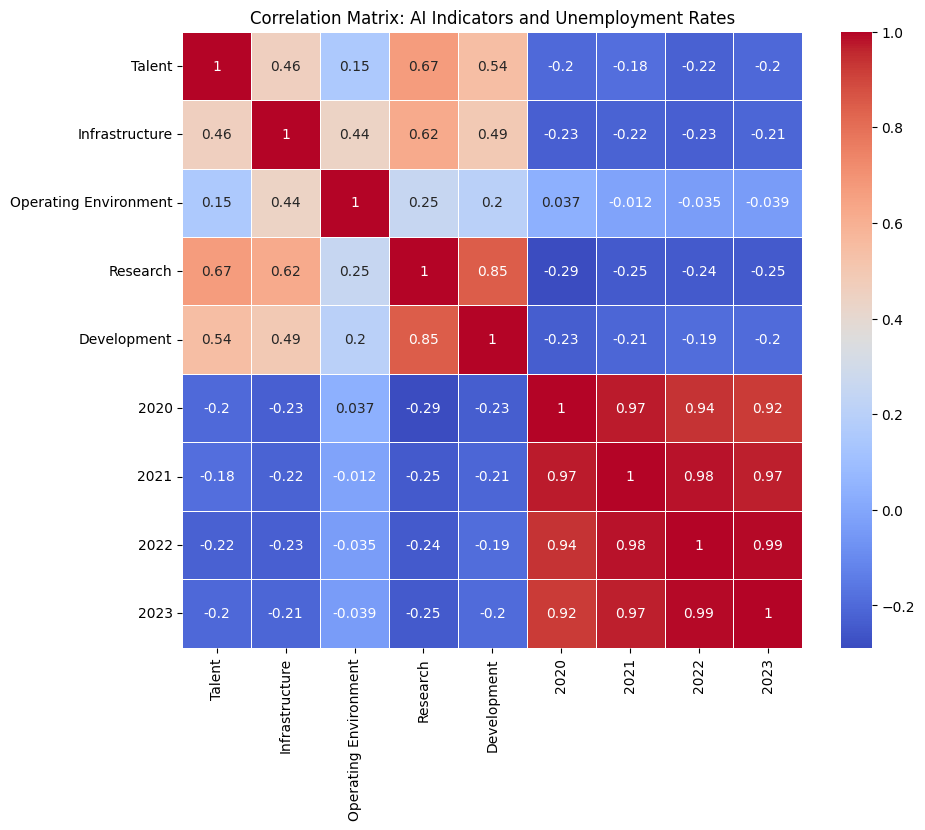

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: AI Indicators and Unemployment Rates')
plt.show()

Step: Time Series Analysis of Unemployment Rates

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

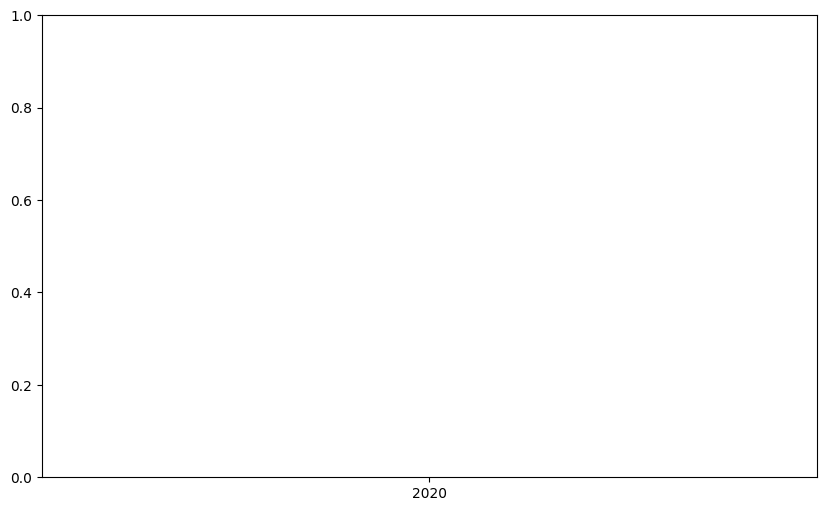

In [69]:
# Subset of countries to plot
countries_subset = ['United States of America', 'China', 'United Kingdom', 'Canada', 'Germany']

# Plot unemployment rates over time for the selected countries
plt.figure(figsize=(10, 6))
for country in countries_subset:
    country_data = merged_data[merged_data['Country'] == country]
    plt.plot(['2020', '2021', '2022', '2023'], country_data[['2020', '2021', '2022', '2023']].values.flatten(), label=country)

plt.title('Unemployment Rate Trends (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_9094/494029151.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


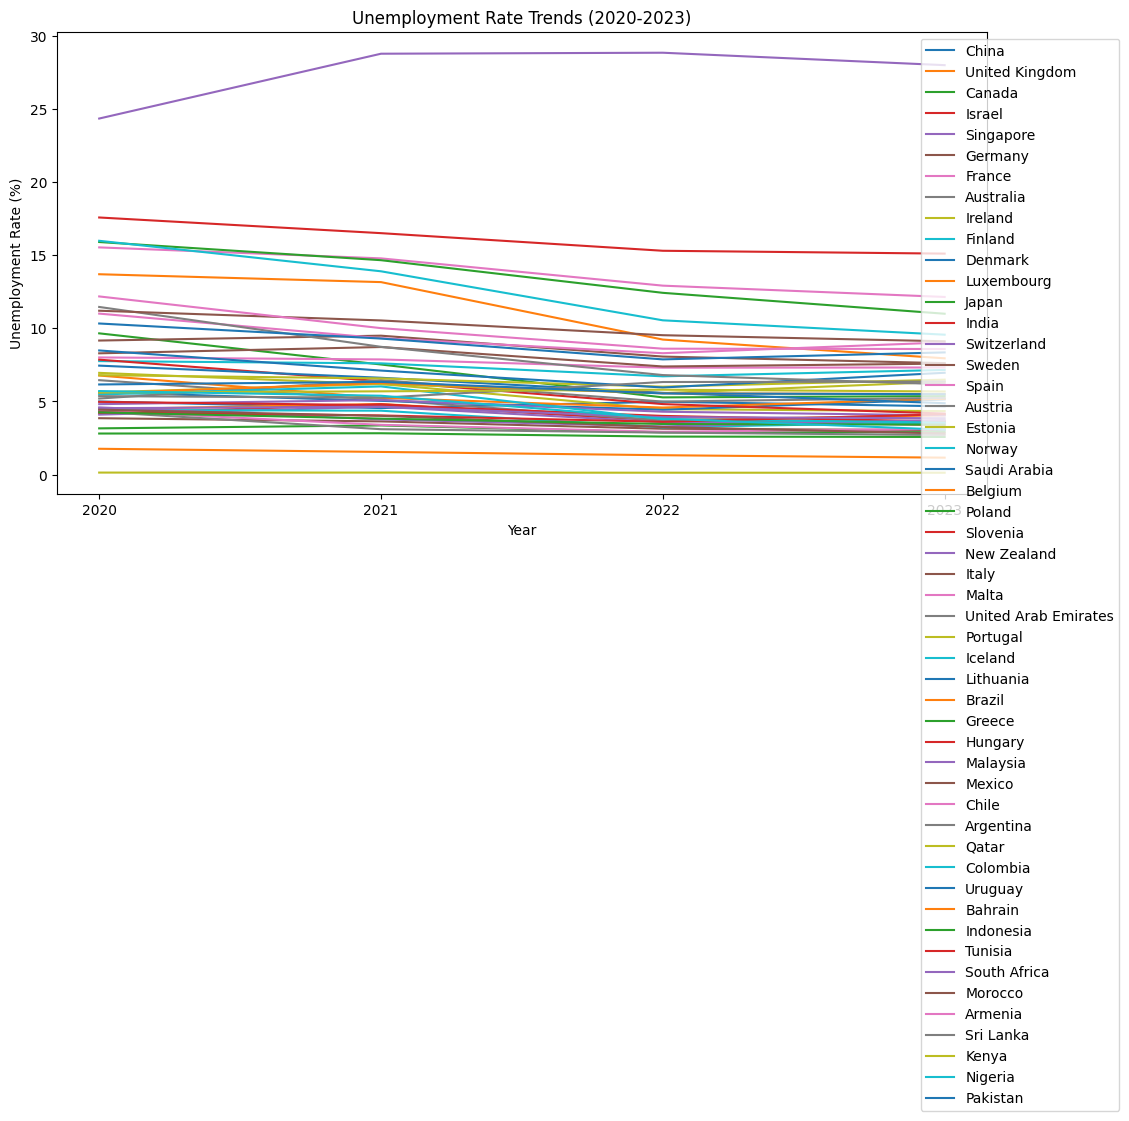

In [71]:
# Initialize the plot
plt.figure(figsize=(12, 6))

# Loop through all unique countries in the merged data
for country in merged_data['Country'].unique():
    # Check if unemployment data for 2020-2023 is not missing
    country_data = merged_data[merged_data['Country'] == country]
    if not country_data[['2020', '2021', '2022', '2023']].isnull().values.any():
        plt.plot(['2020', '2021', '2022', '2023'], country_data[['2020', '2021', '2022', '2023']].values.flatten(), label=country)

plt.title('Unemployment Rate Trends (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

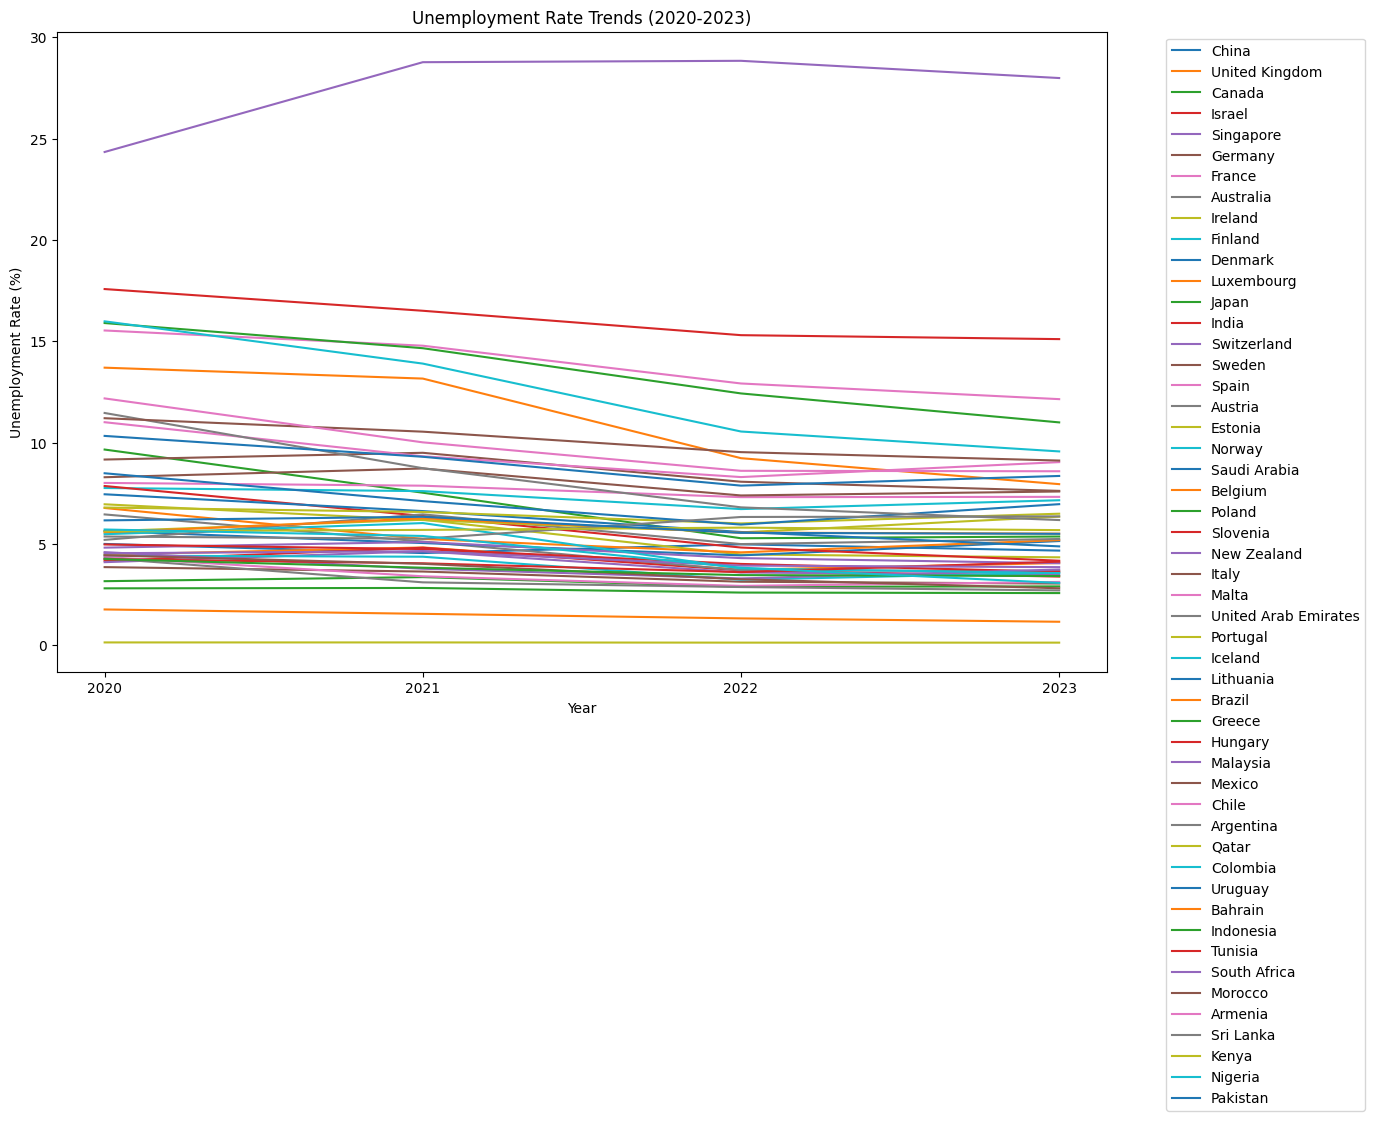

In [73]:
# Initialize the plot with larger figure size to allow more space
plt.figure(figsize=(14, 8))

# Loop through all unique countries in the merged data
for country in merged_data['Country'].unique():
    # Check if unemployment data for 2020-2023 is not missing
    country_data = merged_data[merged_data['Country'] == country]
    if not country_data[['2020', '2021', '2022', '2023']].isnull().values.any():
        plt.plot(['2020', '2021', '2022', '2023'], country_data[['2020', '2021', '2022', '2023']].values.flatten(), label=country)

plt.title('Unemployment Rate Trends (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

# Adjust the legend to be outside the plot for better space management
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)

# Adjust spacing to accommodate the title, labels, and legend
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)

plt.show()

In [75]:
# Calculate the average unemployment rate for each country (2020-2023)
merged_data['Average Unemployment'] = merged_data[['2020', '2021', '2022', '2023']].mean(axis=1)

# Sort countries by the average unemployment rate and select the top 20
top_20_countries = merged_data.sort_values(by='Average Unemployment', ascending=False).head(20)

# Display the top 20 countries based on the average unemployment rate
print(top_20_countries[['Country', 'Average Unemployment']])

         Country  Average Unemployment
44  South Africa              27.48375
43       Tunisia              16.12200
16         Spain              13.84350
32        Greece              13.49475
39      Colombia              12.49825
31        Brazil              11.00925
45       Morocco              10.09650
46       Armenia               9.84650
36         Chile               9.41675
40       Uruguay               8.96550
25         Italy               8.58700
37     Argentina               8.29500
15        Sweden               7.99800
6         France               7.62875
9        Finland               7.30975
30     Lithuania               7.12925
2         Canada               6.95750
28      Portugal               6.46875
18       Estonia               6.26250
20  Saudi Arabia               6.13500


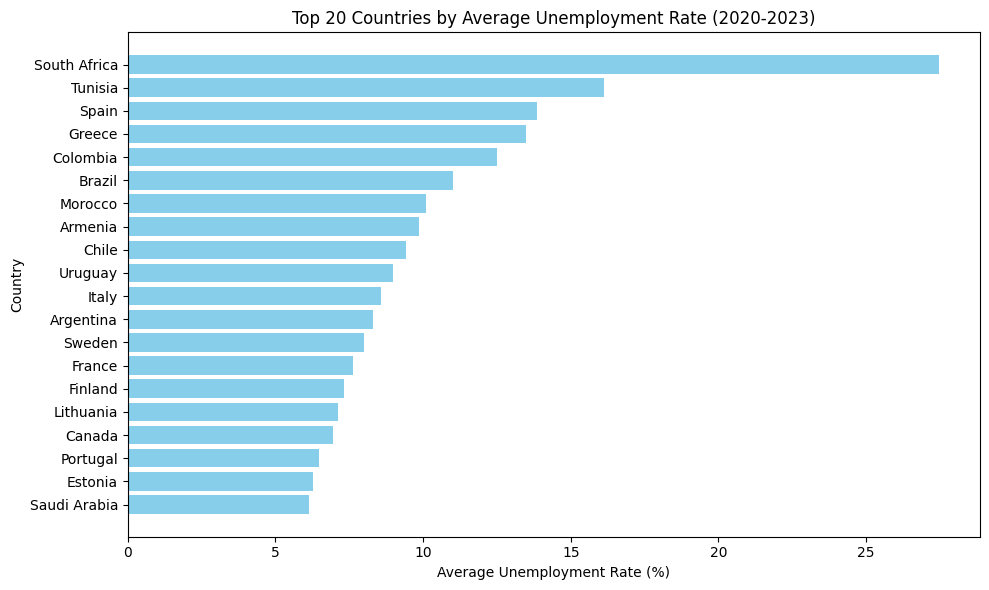

In [77]:
import matplotlib.pyplot as plt

# Create a bar chart for the top 20 countries
plt.figure(figsize=(10, 6))

# Plot bar chart
plt.barh(top_20_countries['Country'], top_20_countries['Average Unemployment'], color='skyblue')

# Add labels and title
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Country')
plt.title('Top 20 Countries by Average Unemployment Rate (2020-2023)')

# Invert y-axis to show the highest values at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

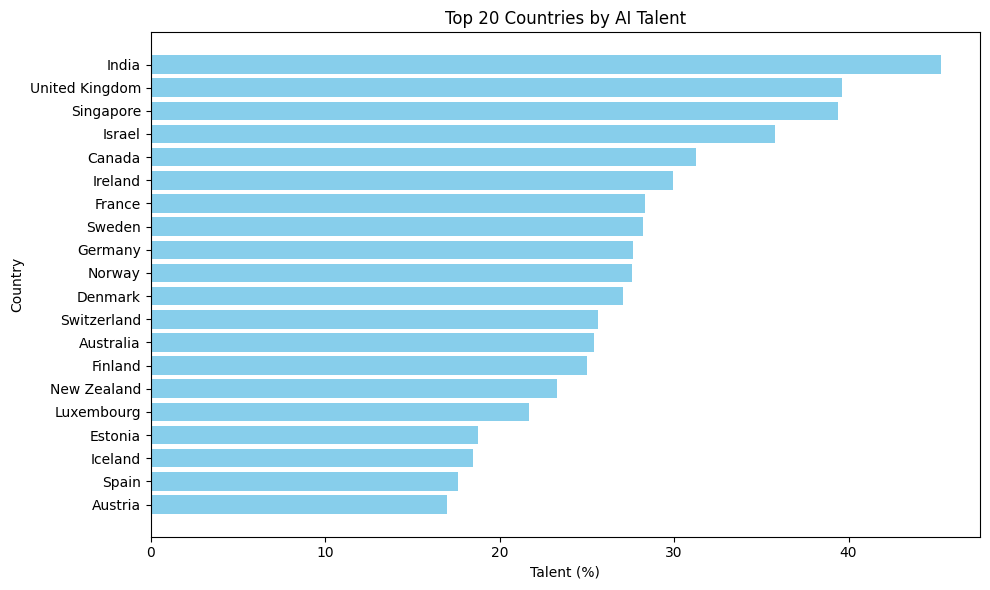

In [81]:
# Sort countries by Talent and select the top 20
top_20_countries_talent = merged_data.sort_values(by='Talent', ascending=False).head(20)

# Plot bar chart for Talent
plt.figure(figsize=(10, 6))
plt.barh(top_20_countries_talent['Country'], top_20_countries_talent['Talent'], color='skyblue')

# Add labels and title
plt.xlabel('Talent (%)')
plt.ylabel('Country')
plt.title('Top 20 Countries by AI Talent')

# Invert y-axis
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


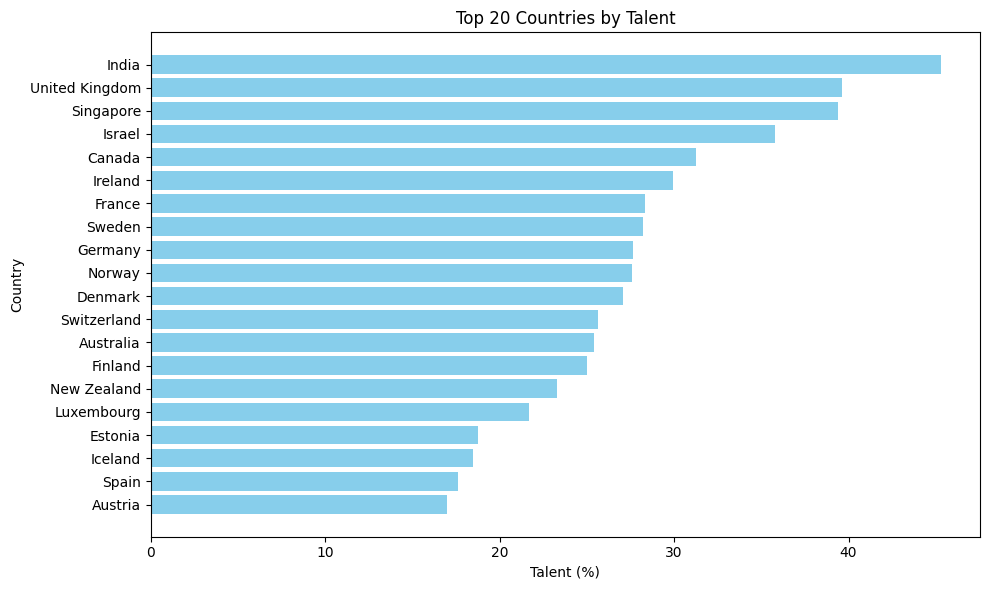

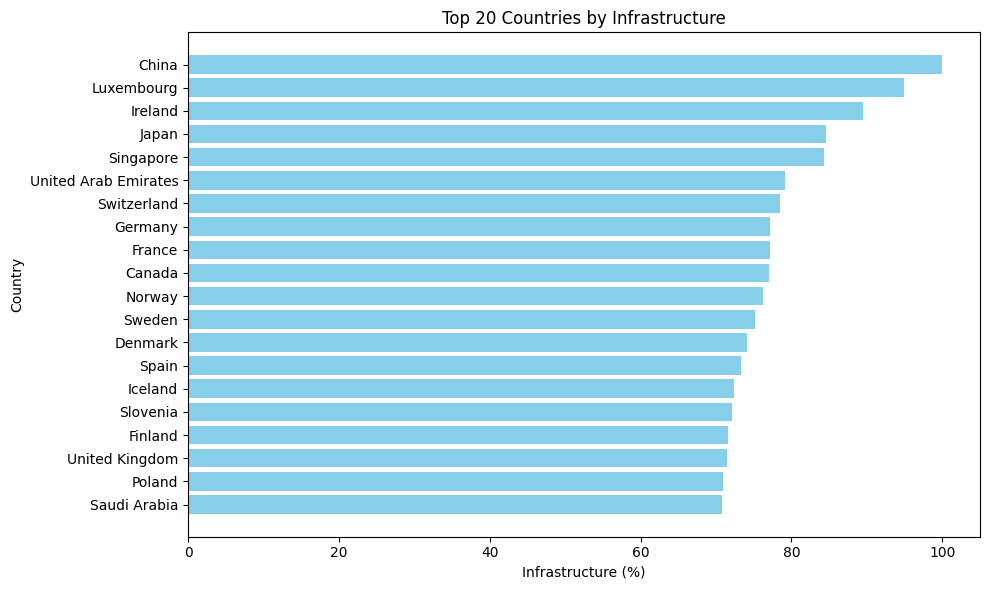

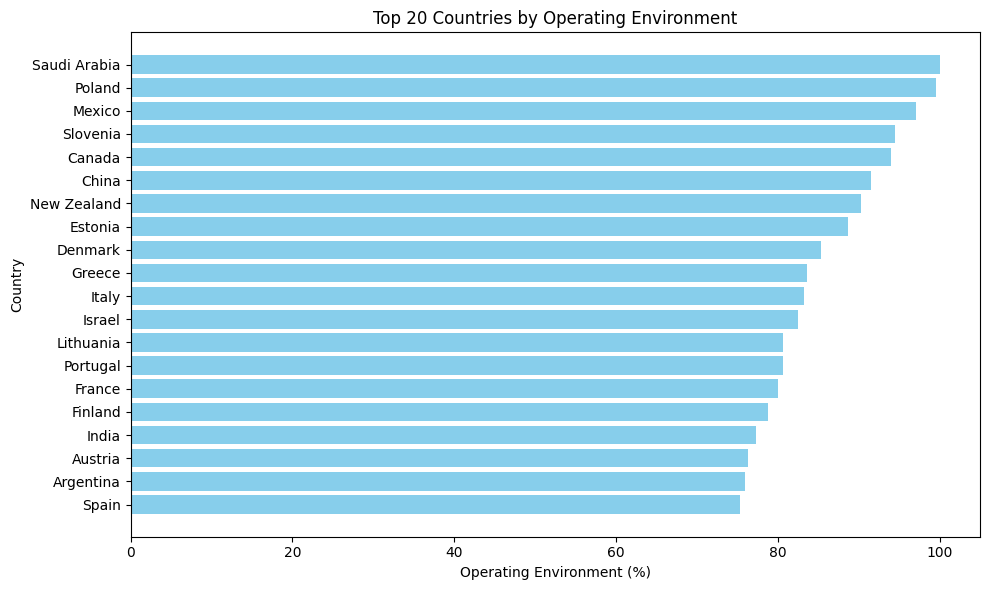

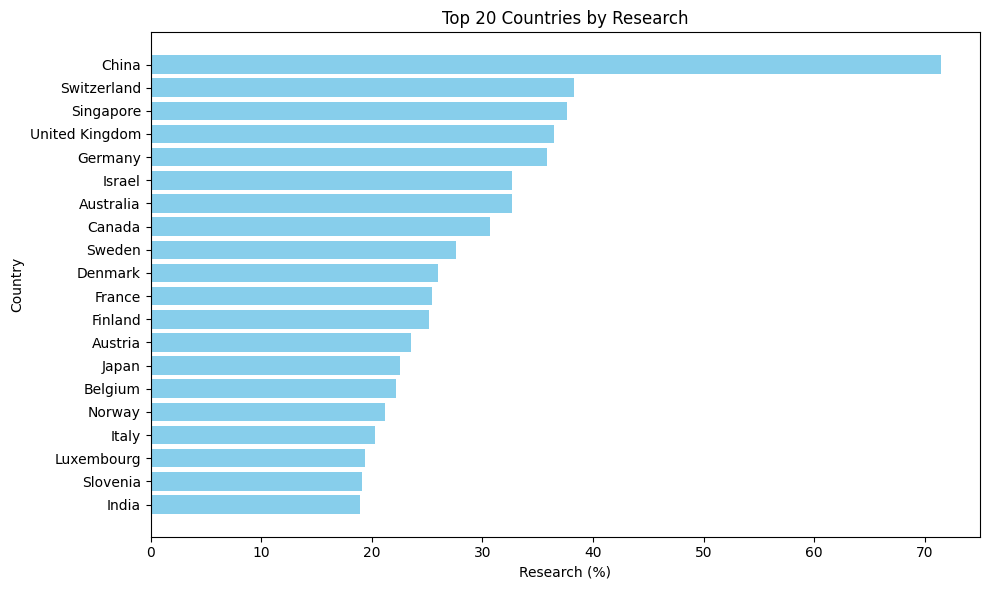

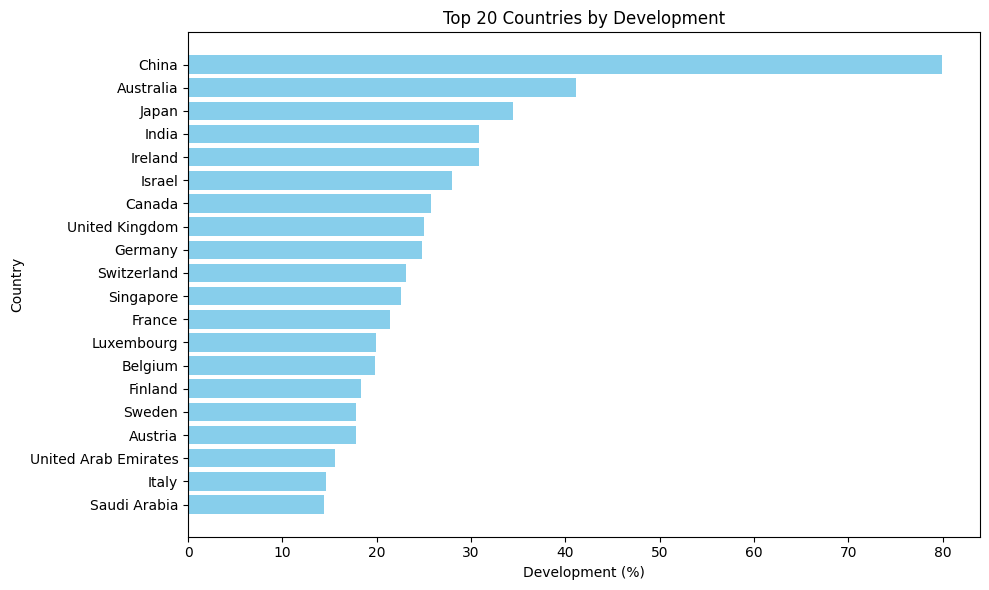

In [83]:
import matplotlib.pyplot as plt

# List of AI indicators
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']
color = 'skyblue'  # Define the same color for all bars

# Loop through each AI indicator and plot the top 20 countries
for column in ai_columns:
    # Sort countries by the current AI indicator and select the top 20
    top_20_countries_ai = merged_data.sort_values(by=column, ascending=False).head(20)
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_20_countries_ai['Country'], top_20_countries_ai[column], color=color)
    
    # Add labels and title
    plt.xlabel(f'{column} (%)')
    plt.ylabel('Country')
    plt.title(f'Top 20 Countries by {column}')
    
    # Invert y-axis to show the highest values at the top
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

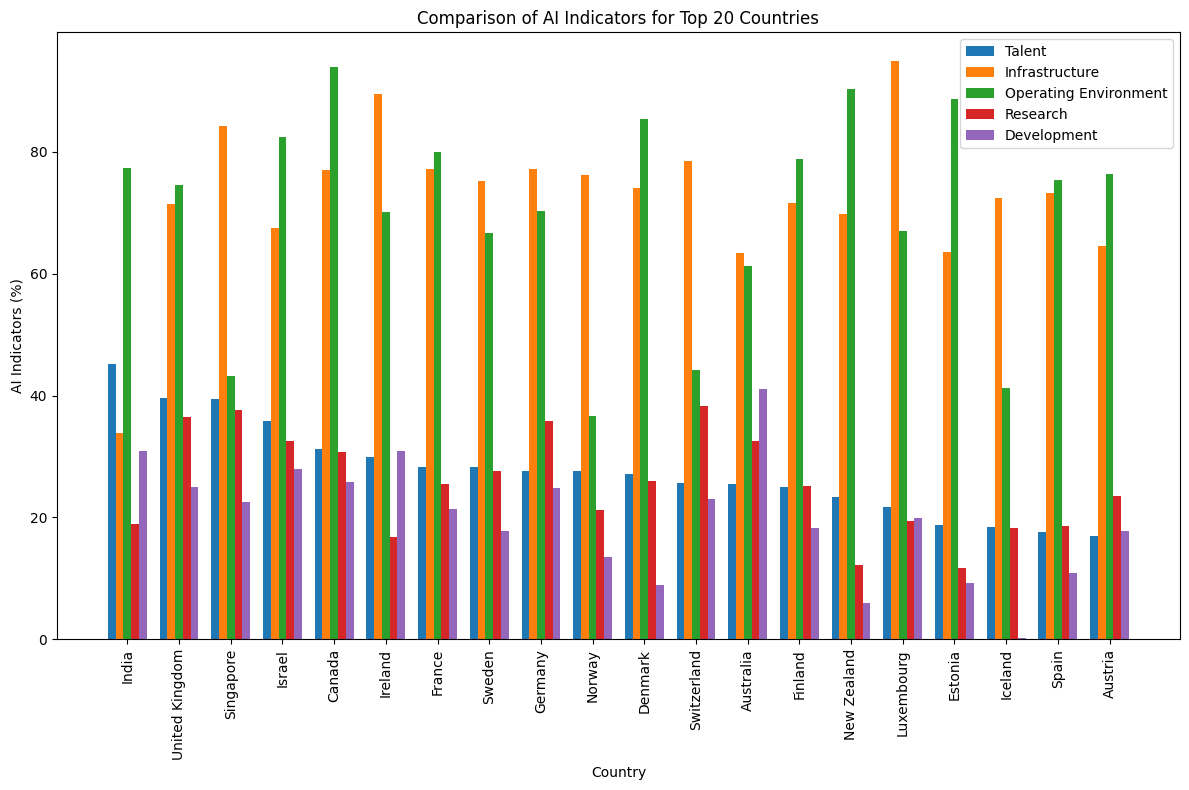

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Select the top 20 countries based on one indicator (e.g., 'Talent')
# You can use a different ranking indicator or take an average of all indicators for consistency
top_20_countries = merged_data.sort_values(by='Talent', ascending=False).head(20)

# List of AI indicators
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']

# Set figure size
plt.figure(figsize=(12, 8))

# Set the bar width and positions
bar_width = 0.15
positions = np.arange(len(top_20_countries))

# Loop through AI indicators and create grouped bars
for i, column in enumerate(ai_columns):
    # Create bars for each AI indicator
    plt.bar(positions + i * bar_width, top_20_countries[column], bar_width, label=column)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('AI Indicators (%)')
plt.title('Comparison of AI Indicators for Top 20 Countries')

# Add country names to x-axis
plt.xticks(positions + bar_width * 2, top_20_countries['Country'], rotation=90)

# Add legend to distinguish the AI indicators
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

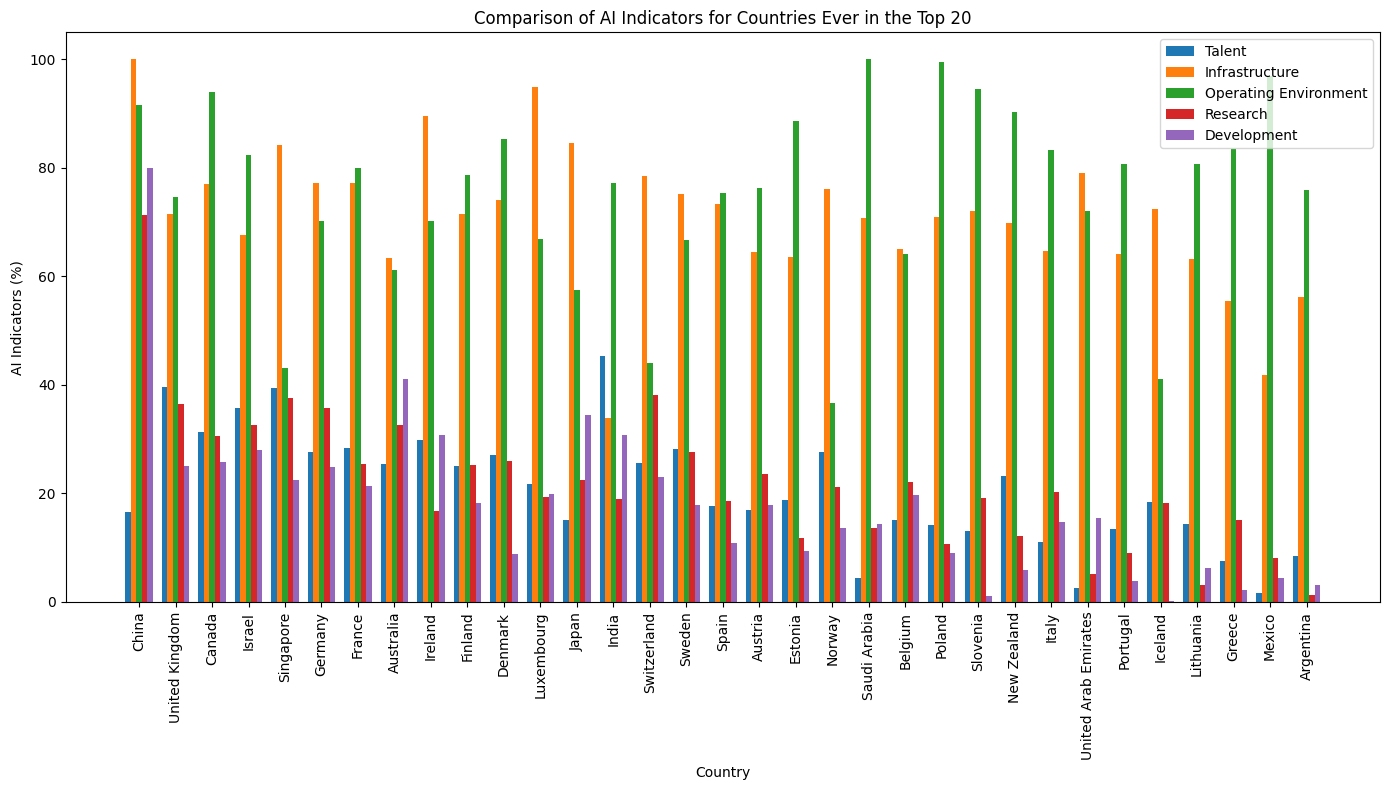

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# List of AI indicators
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']

# Collect all countries that appear in the top 20 for any AI indicator
top_countries = set()  # Use a set to store unique country names
for column in ai_columns:
    top_20_countries = merged_data.sort_values(by=column, ascending=False).head(20)
    top_countries.update(top_20_countries['Country'])

# Convert the set to a list and filter the merged data to include only these countries
top_countries = list(top_countries)
top_countries_data = merged_data[merged_data['Country'].isin(top_countries)]

# Set figure size
plt.figure(figsize=(14, 8))

# Set the bar width and positions
bar_width = 0.15
positions = np.arange(len(top_countries))

# Loop through AI indicators and create grouped bars
for i, column in enumerate(ai_columns):
    plt.bar(positions + i * bar_width, top_countries_data[column], bar_width, label=column)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('AI Indicators (%)')
plt.title('Comparison of AI Indicators for Countries Ever in the Top 20')

# Add country names to x-axis
plt.xticks(positions + bar_width * 2, top_countries_data['Country'], rotation=90)

# Add legend to distinguish the AI indicators
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Step 1: Regional and Cluster Analysis

1.1 Unemployment Rates by Region

In [91]:
import seaborn as sns

# Create boxplots to compare unemployment rates by region for 2020
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='2020', data=merged_data)
plt.title('Unemployment Rates (2020) by Region')
plt.xticks(rotation=45)
plt.ylabel('Unemployment Rate (%)')
plt.show()

ValueError: Could not interpret value `Region` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [93]:
# Check the column names in merged_data
print(merged_data.columns)

Index(['Country', 'Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial', '2020',
       '2021', '2022', '2023', 'Average Unemployment'],
      dtype='object')


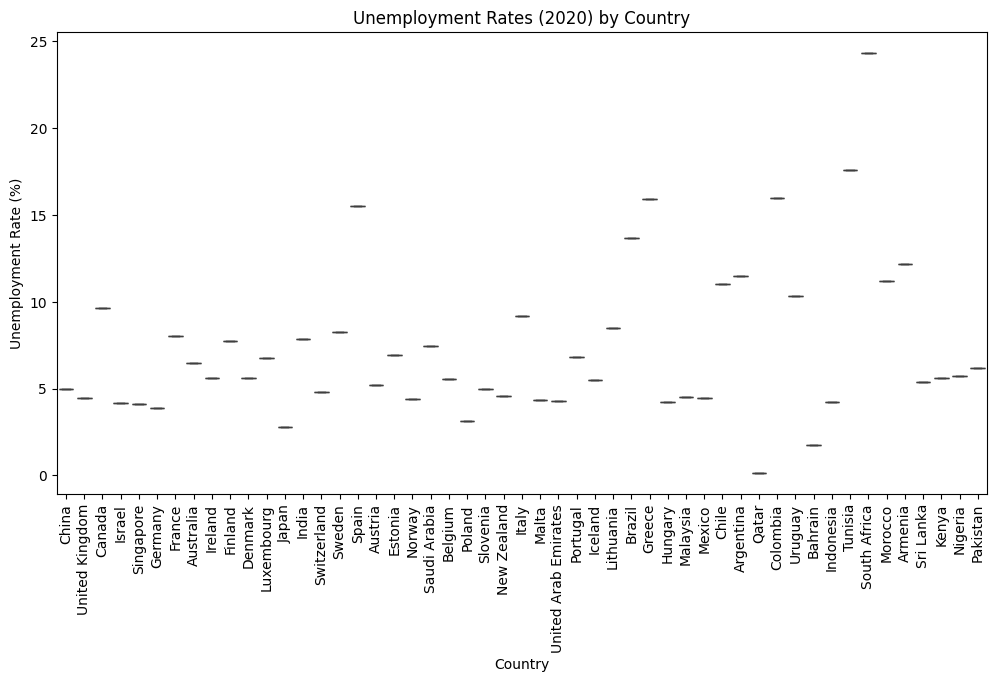

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of unemployment rates by country for 2020
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='2020', data=merged_data)
plt.title('Unemployment Rates (2020) by Country')
plt.xticks(rotation=90)
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [97]:
# Melt the unemployment data from 2020 to 2023 into a long format
melted_data = merged_data.melt(id_vars=['Country', 'Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development'], 
                               value_vars=['2020', '2021', '2022', '2023'], 
                               var_name='Year', 
                               value_name='Unemployment Rate')

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Talent vs Unemployment Rate, with color coding for each year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Talent', y='Unemployment Rate', hue='Year', data=melted_data, palette='deep')

# Add labels and title
plt.title('Talent vs Unemployment Rate (2020-2023)')
plt.xlabel('AI Talent (%)')
plt.ylabel('Unemployment Rate (%)')

# Display the plot
​

SyntaxError: invalid non-printable character U+200B (4234108073.py, line 14)

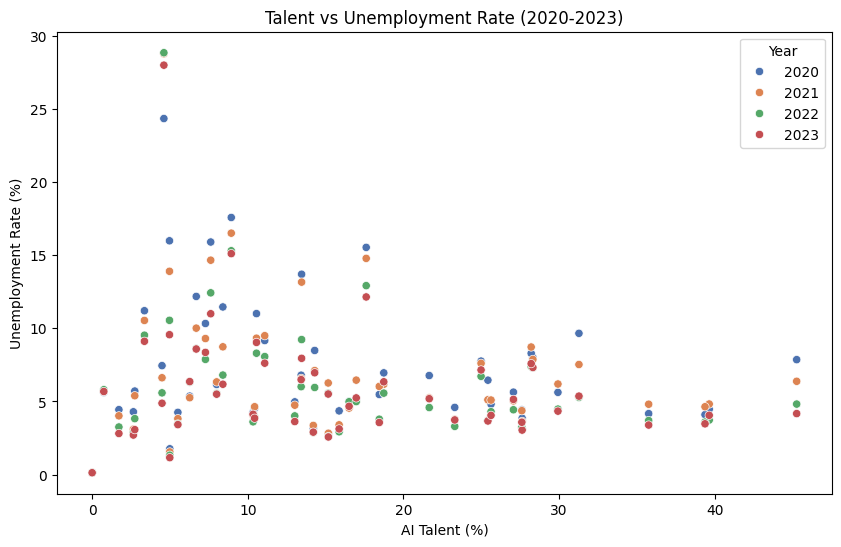

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the unemployment data from 2020 to 2023 into a long format
melted_data = merged_data.melt(
    id_vars=['Country', 'Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development'], 
    value_vars=['2020', '2021', '2022', '2023'], 
    var_name='Year', 
    value_name='Unemployment Rate'
)

# Scatter plot of Talent vs Unemployment Rate, with color coding for each year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Talent', y='Unemployment Rate', hue='Year', data=melted_data, palette='deep')

# Add labels and title
plt.title('Talent vs Unemployment Rate (2020-2023)')
plt.xlabel('AI Talent (%)')
plt.ylabel('Unemployment Rate (%)')

# Display the plot
plt.show()

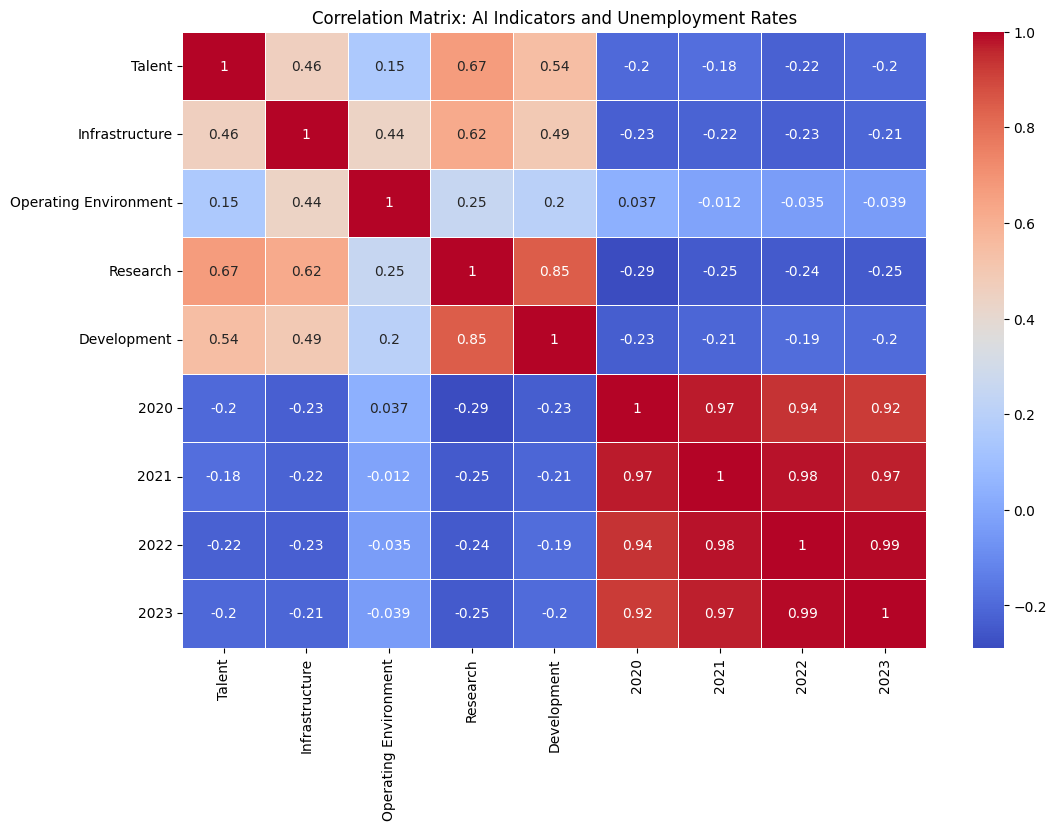

In [105]:
# Correlation matrix for AI indicators and unemployment rates
correlation_matrix = merged_data[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', '2020', '2021', '2022', '2023']].corr()

# Plot the heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: AI Indicators and Unemployment Rates')
plt.show()

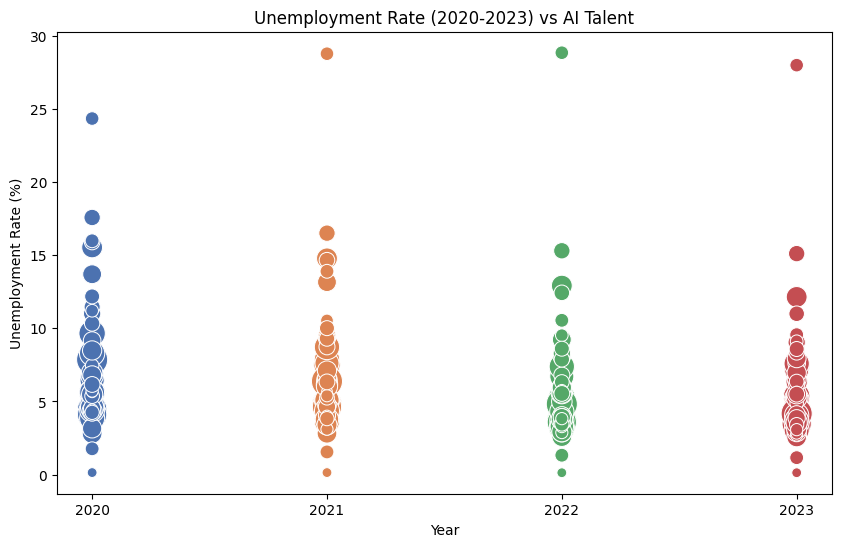

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Year vs Unemployment Rate, with AI Talent as the size of the spots
plt.figure(figsize=(10, 6))

# Plotting the years on the x-axis and unemployment on the y-axis, with Talent as the size
sns.scatterplot(x='Year', y='Unemployment Rate', size='Talent', sizes=(50, 500), hue='Year', data=melted_data, palette='deep', legend=False)

# Add labels and title
plt.title('Unemployment Rate (2020-2023) vs AI Talent')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

# Display the plot
plt.show()

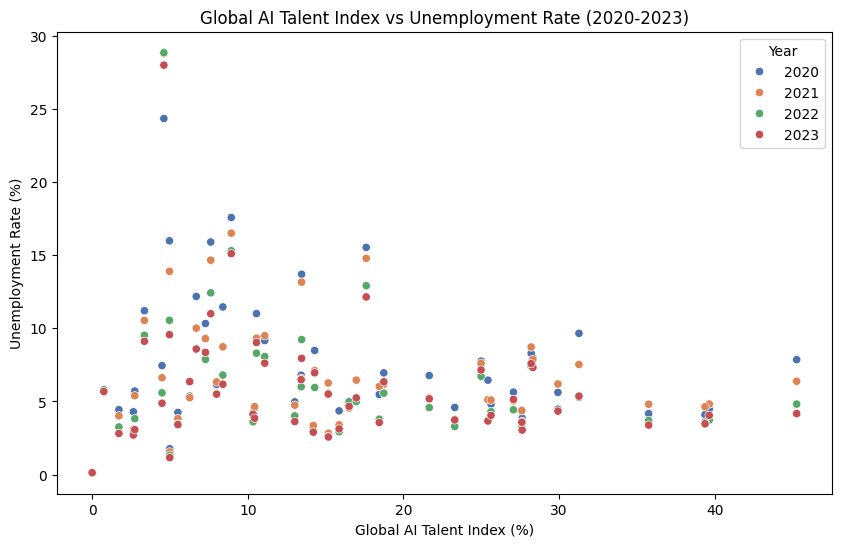

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Global AI Talent Index vs Unemployment Rate, with color coding for each year
plt.figure(figsize=(10, 6))

# Plotting AI Talent on x-axis and Unemployment Rate on y-axis
sns.scatterplot(x='Talent', y='Unemployment Rate', hue='Year', data=melted_data, palette='deep')

# Add labels and title
plt.title('Global AI Talent Index vs Unemployment Rate (2020-2023)')
plt.xlabel('Global AI Talent Index (%)')  # Updated x-axis label
plt.ylabel('Unemployment Rate (%)')

# Display the plot
plt.show()

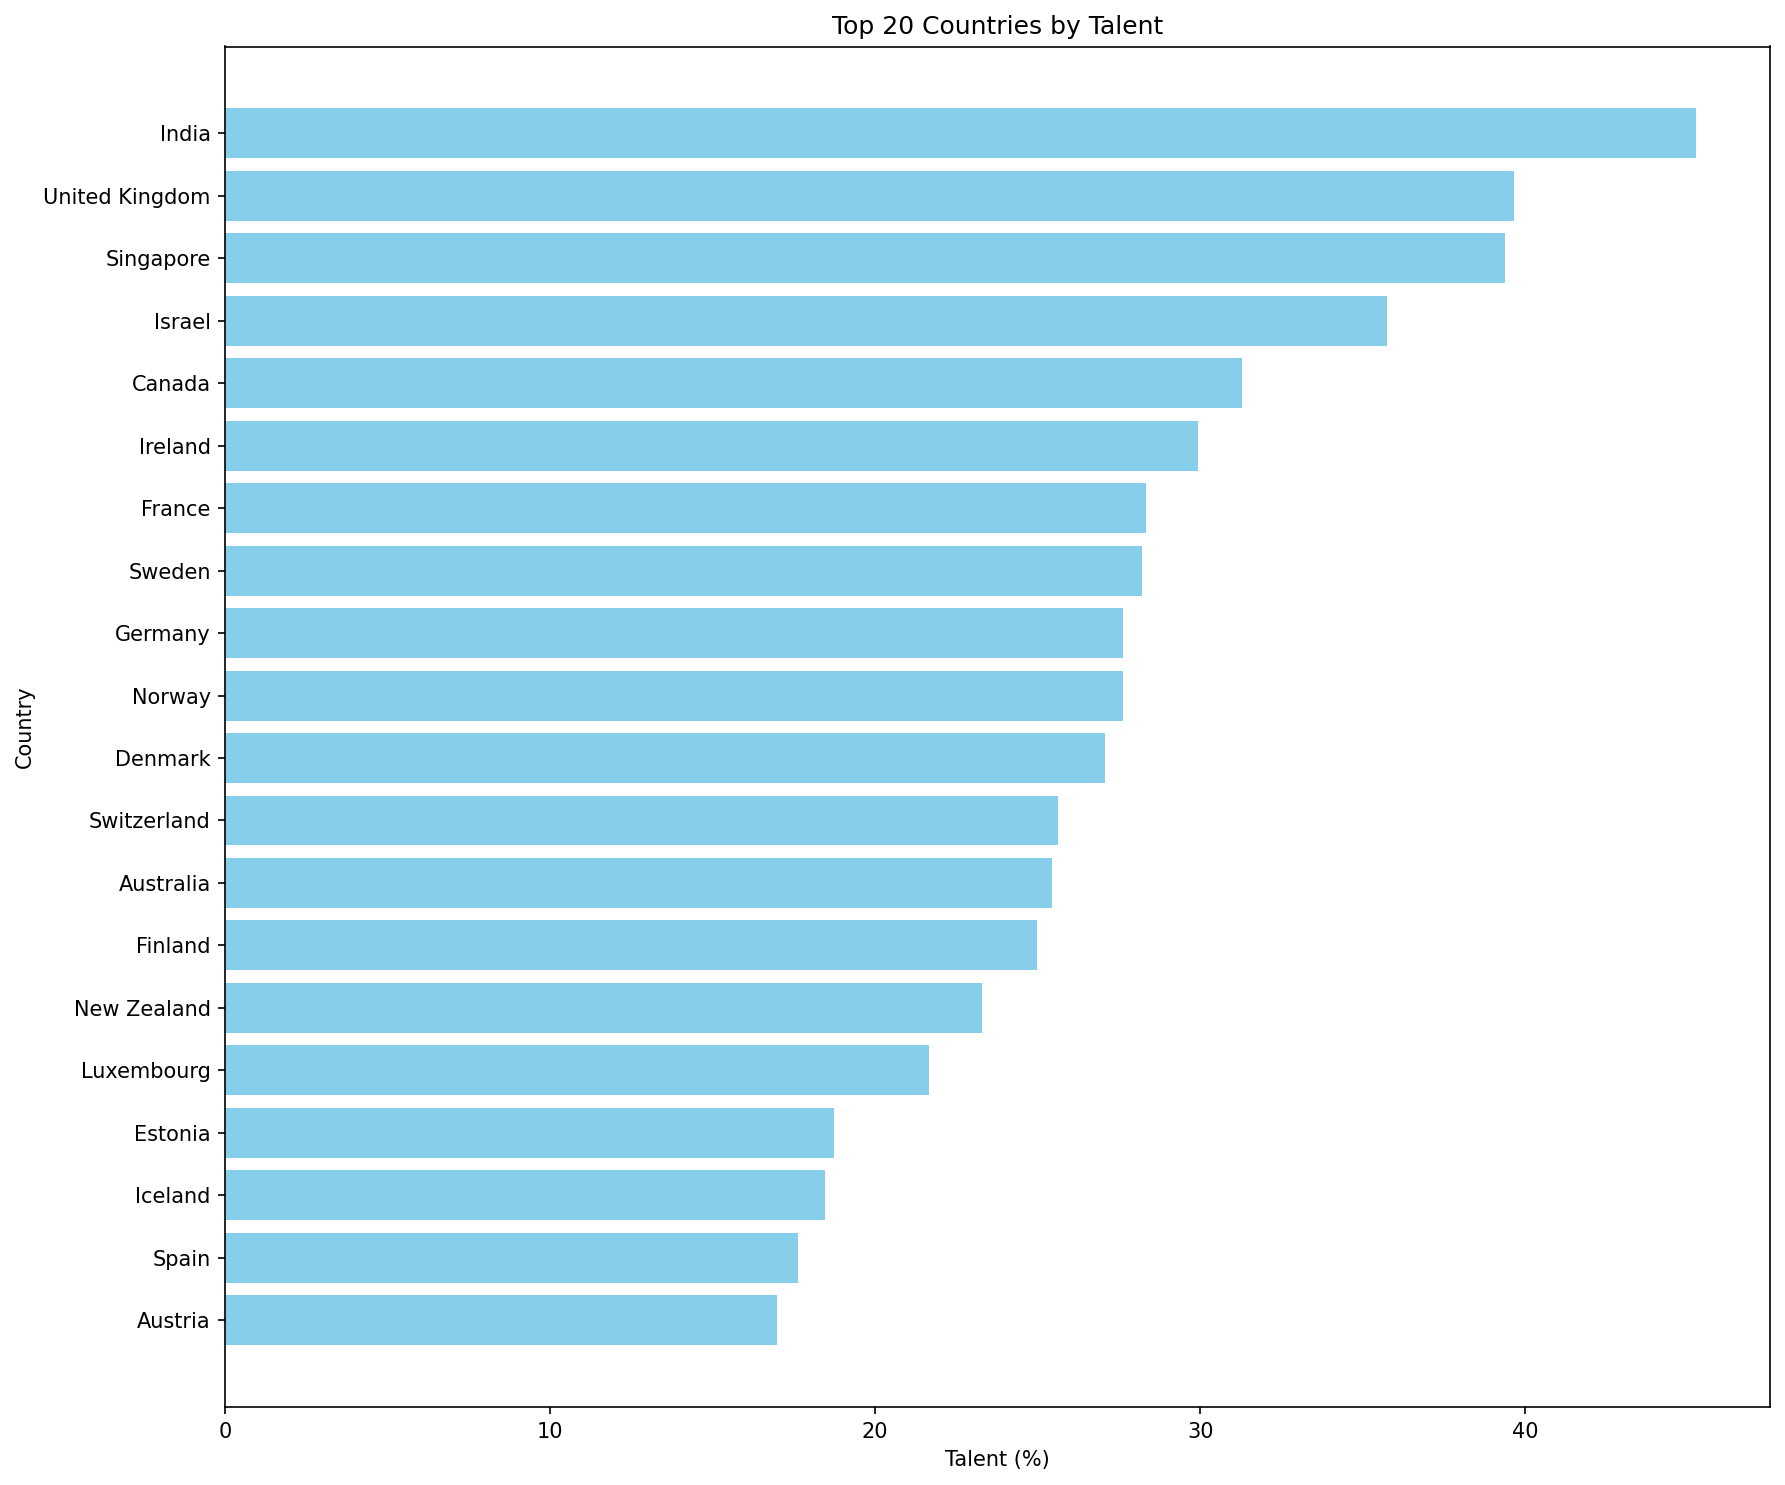

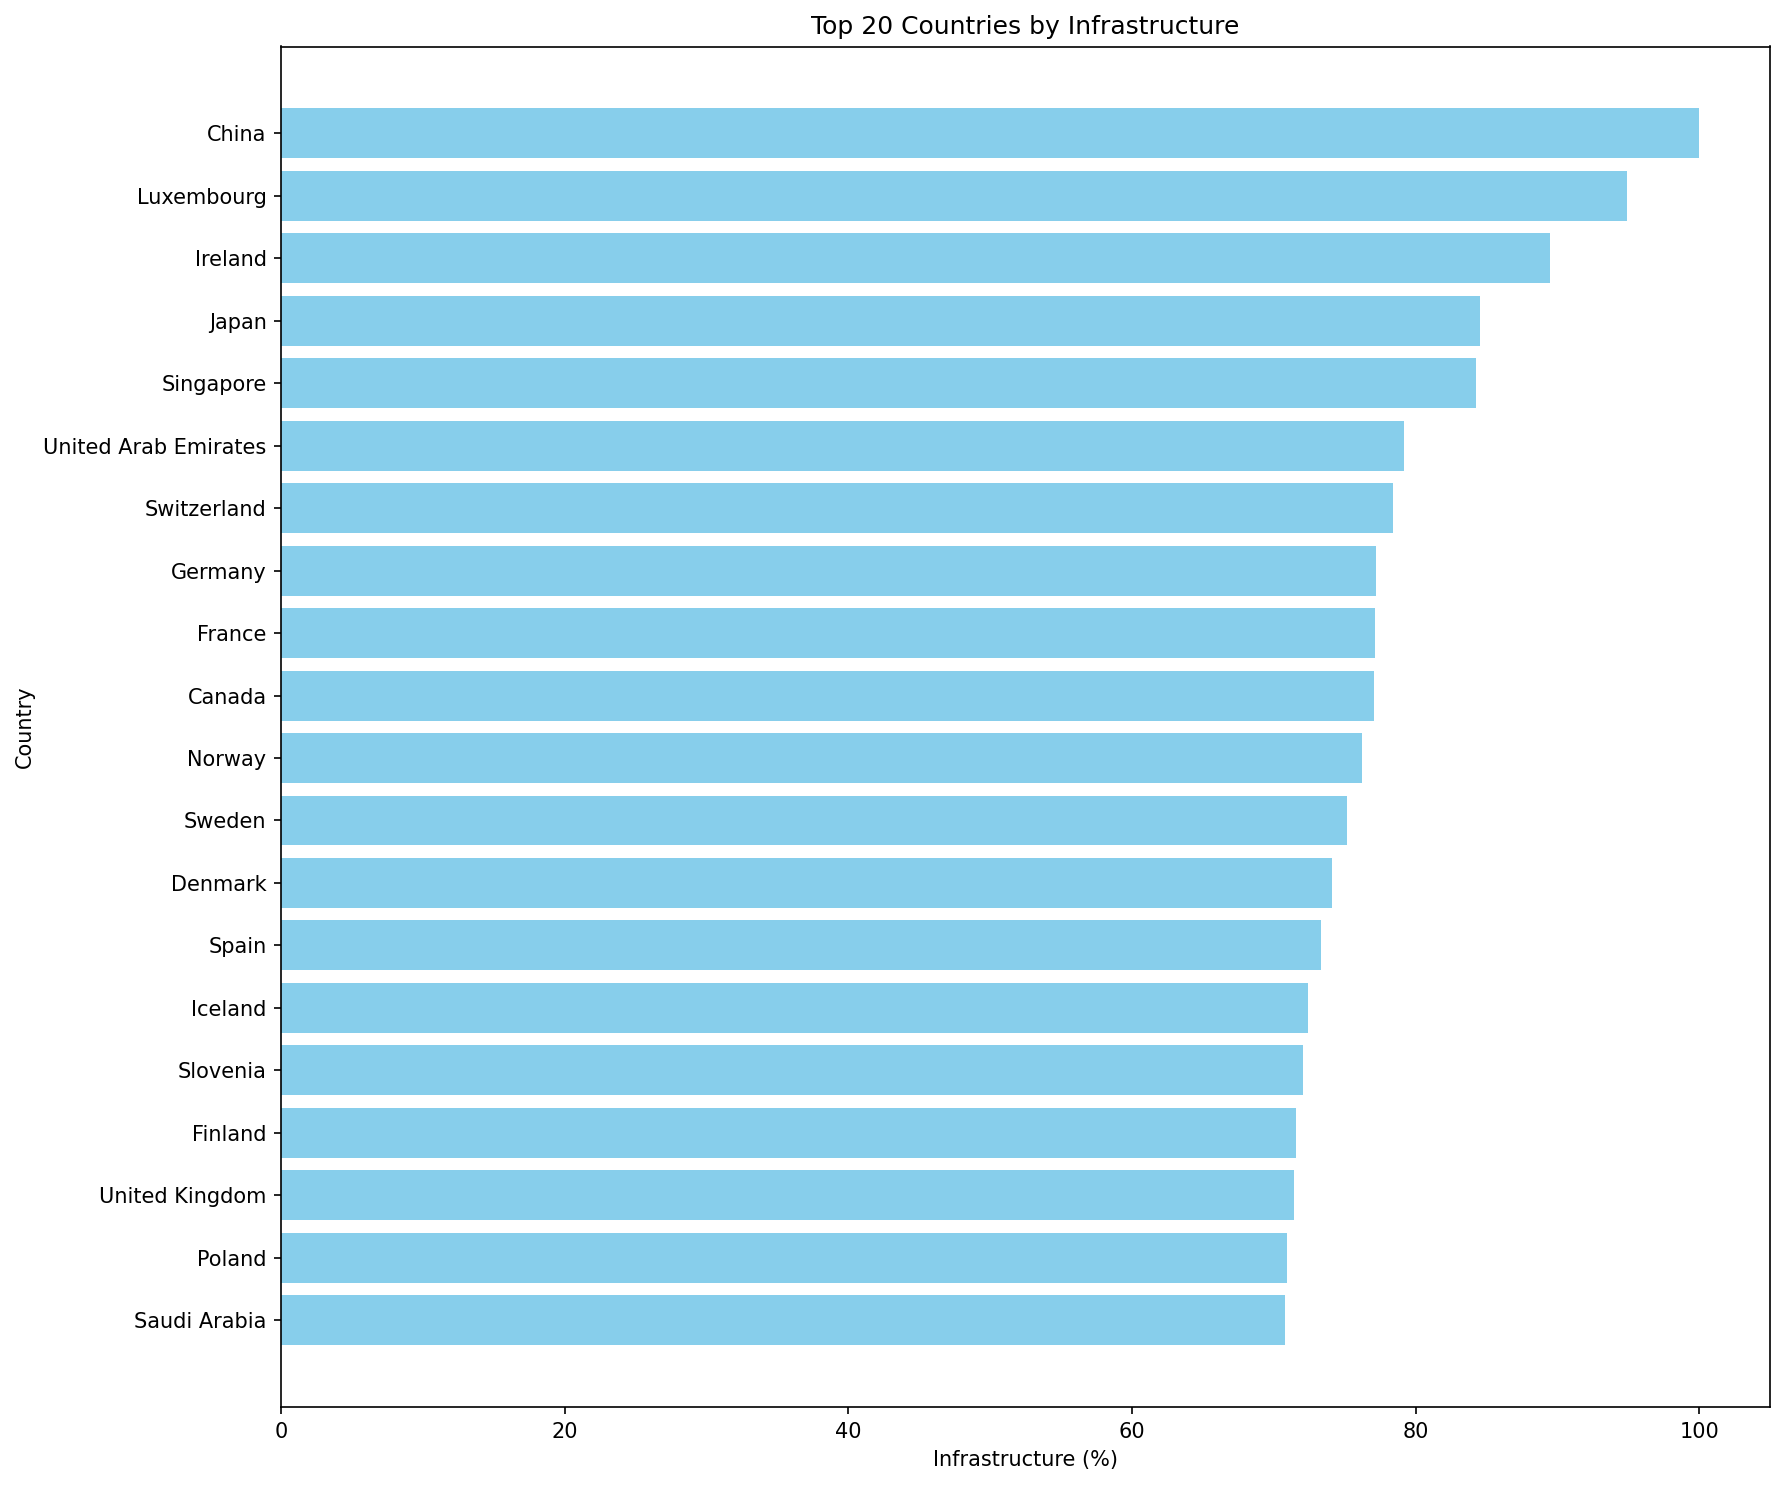

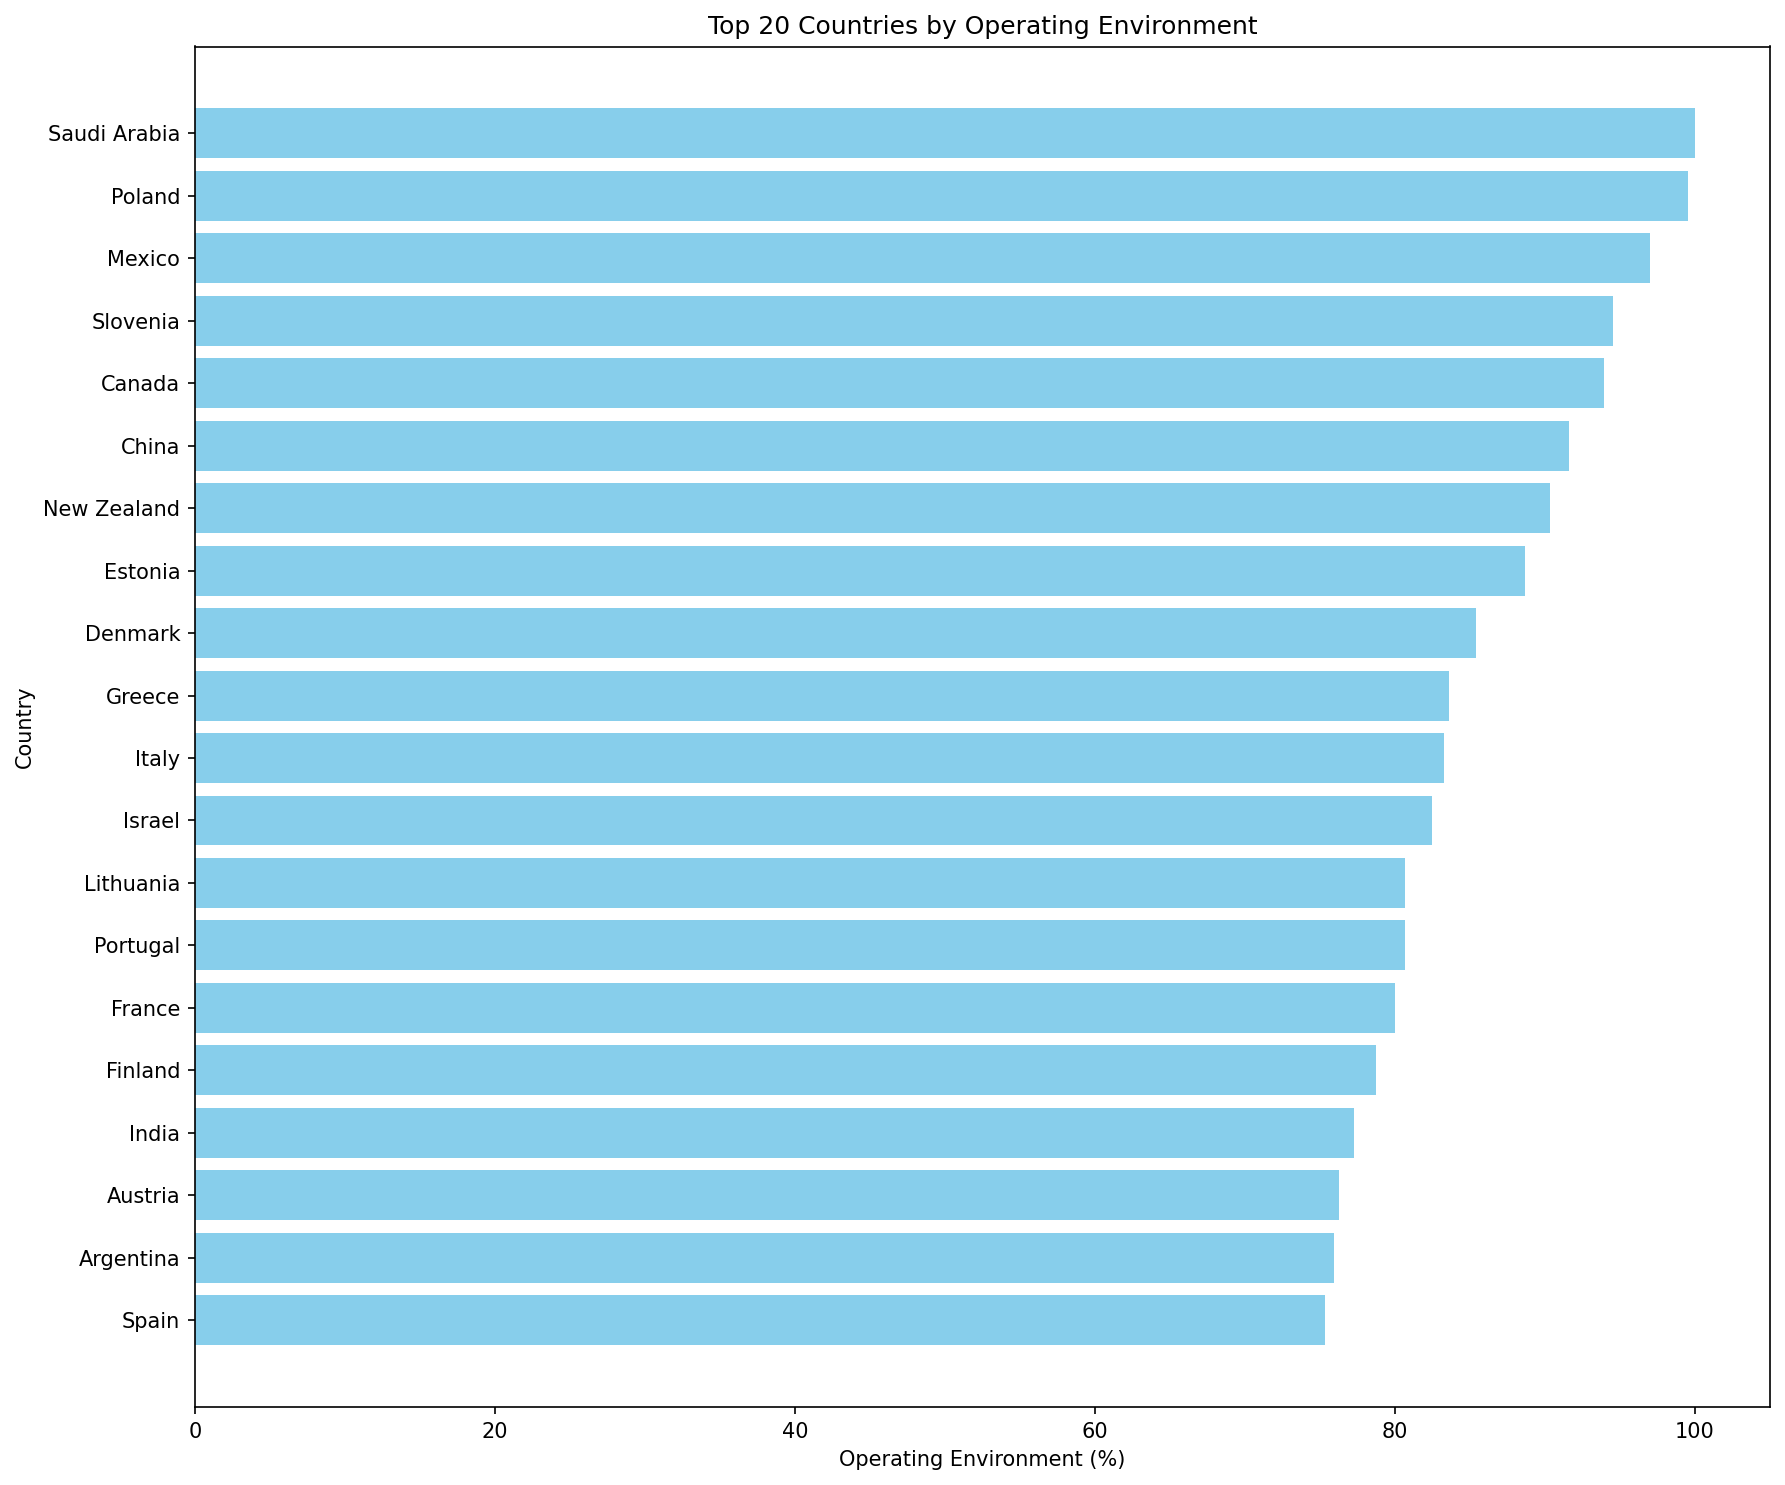

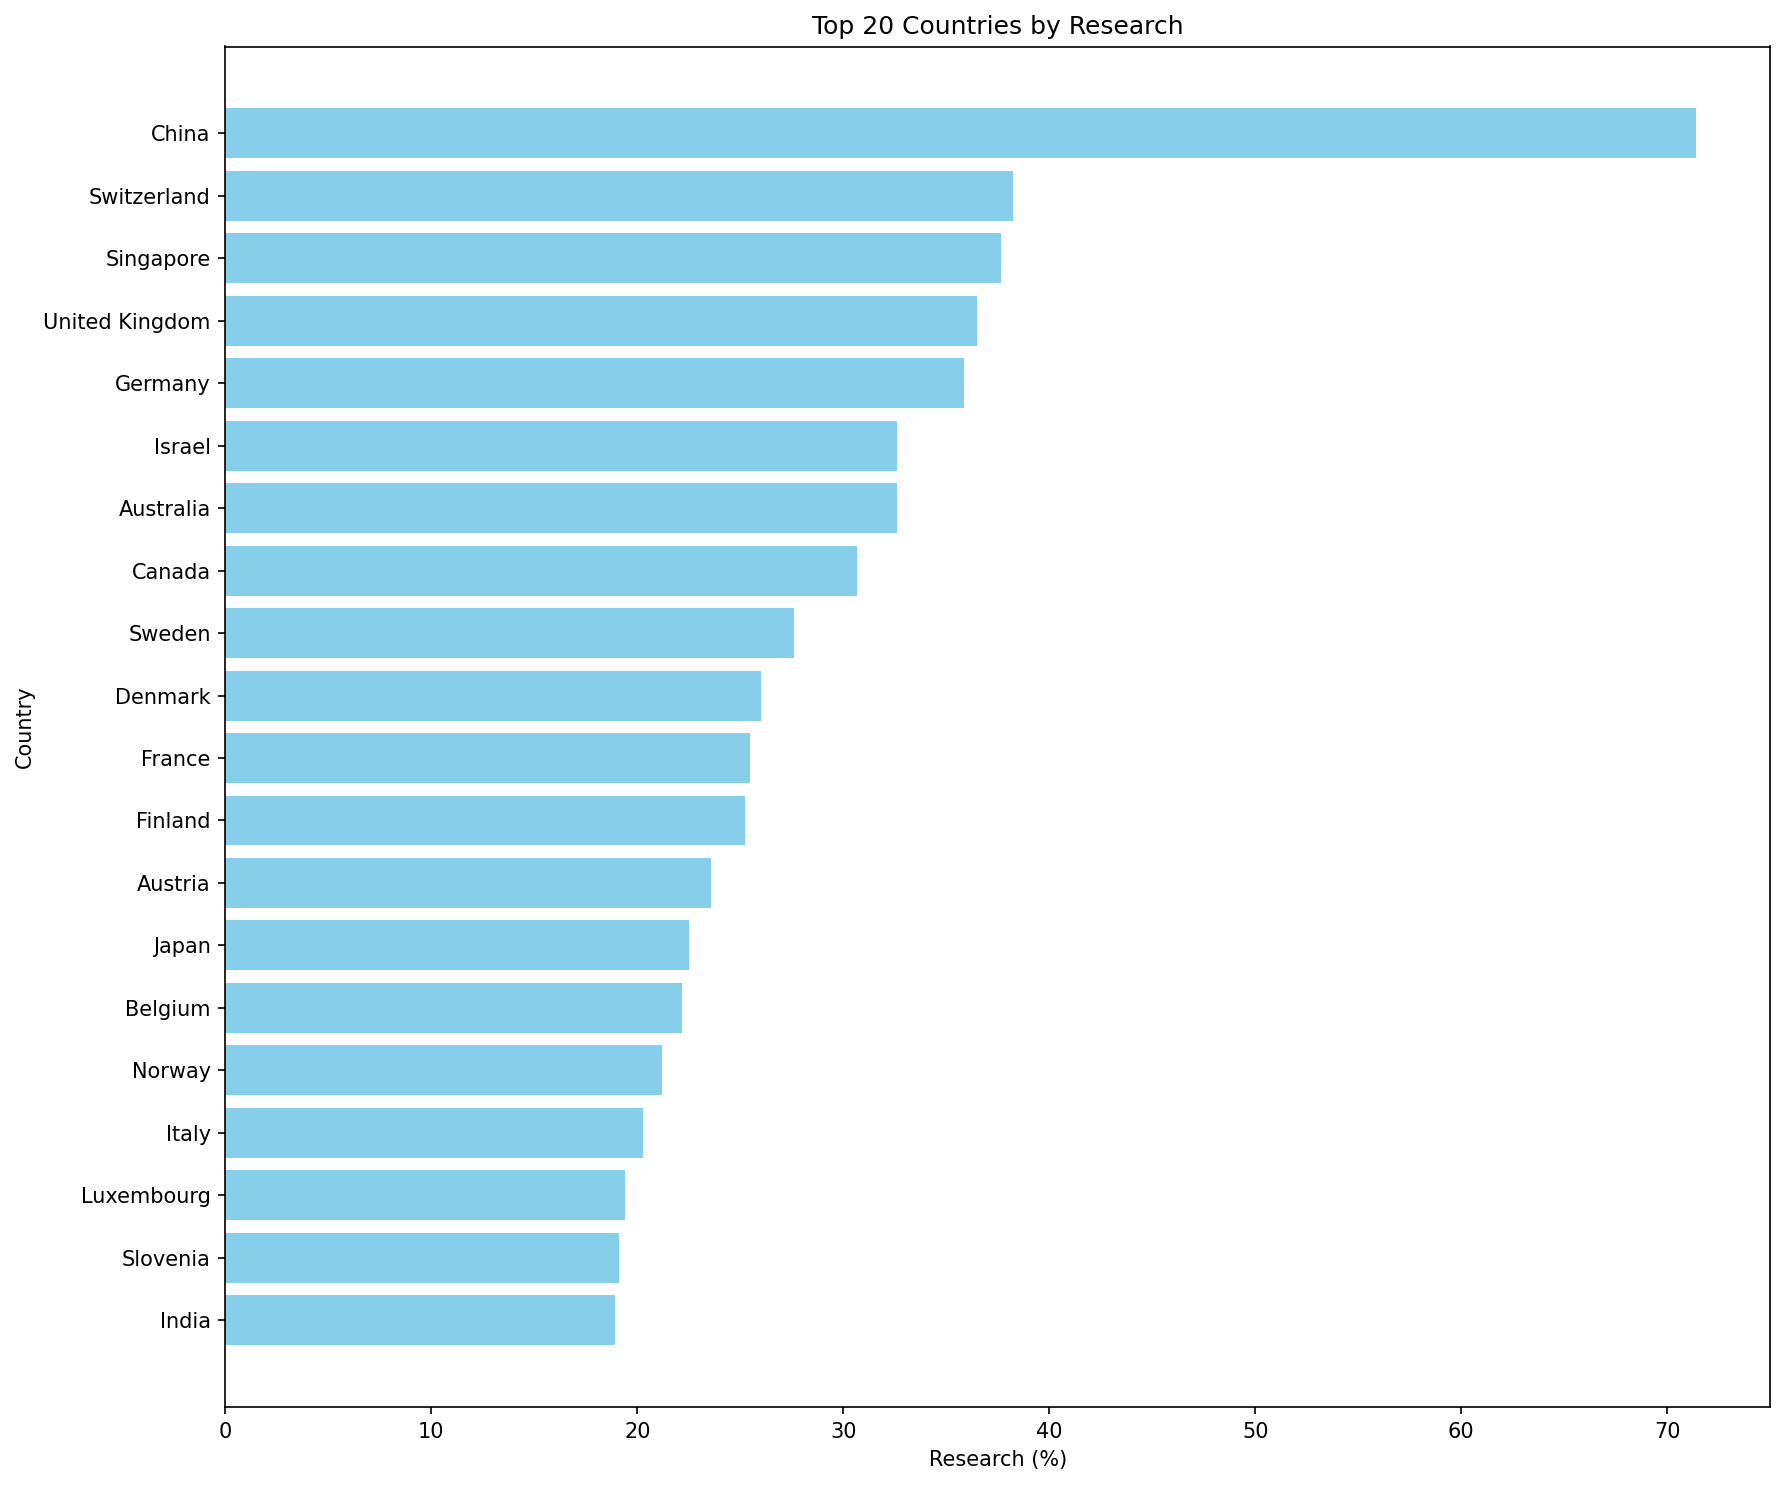

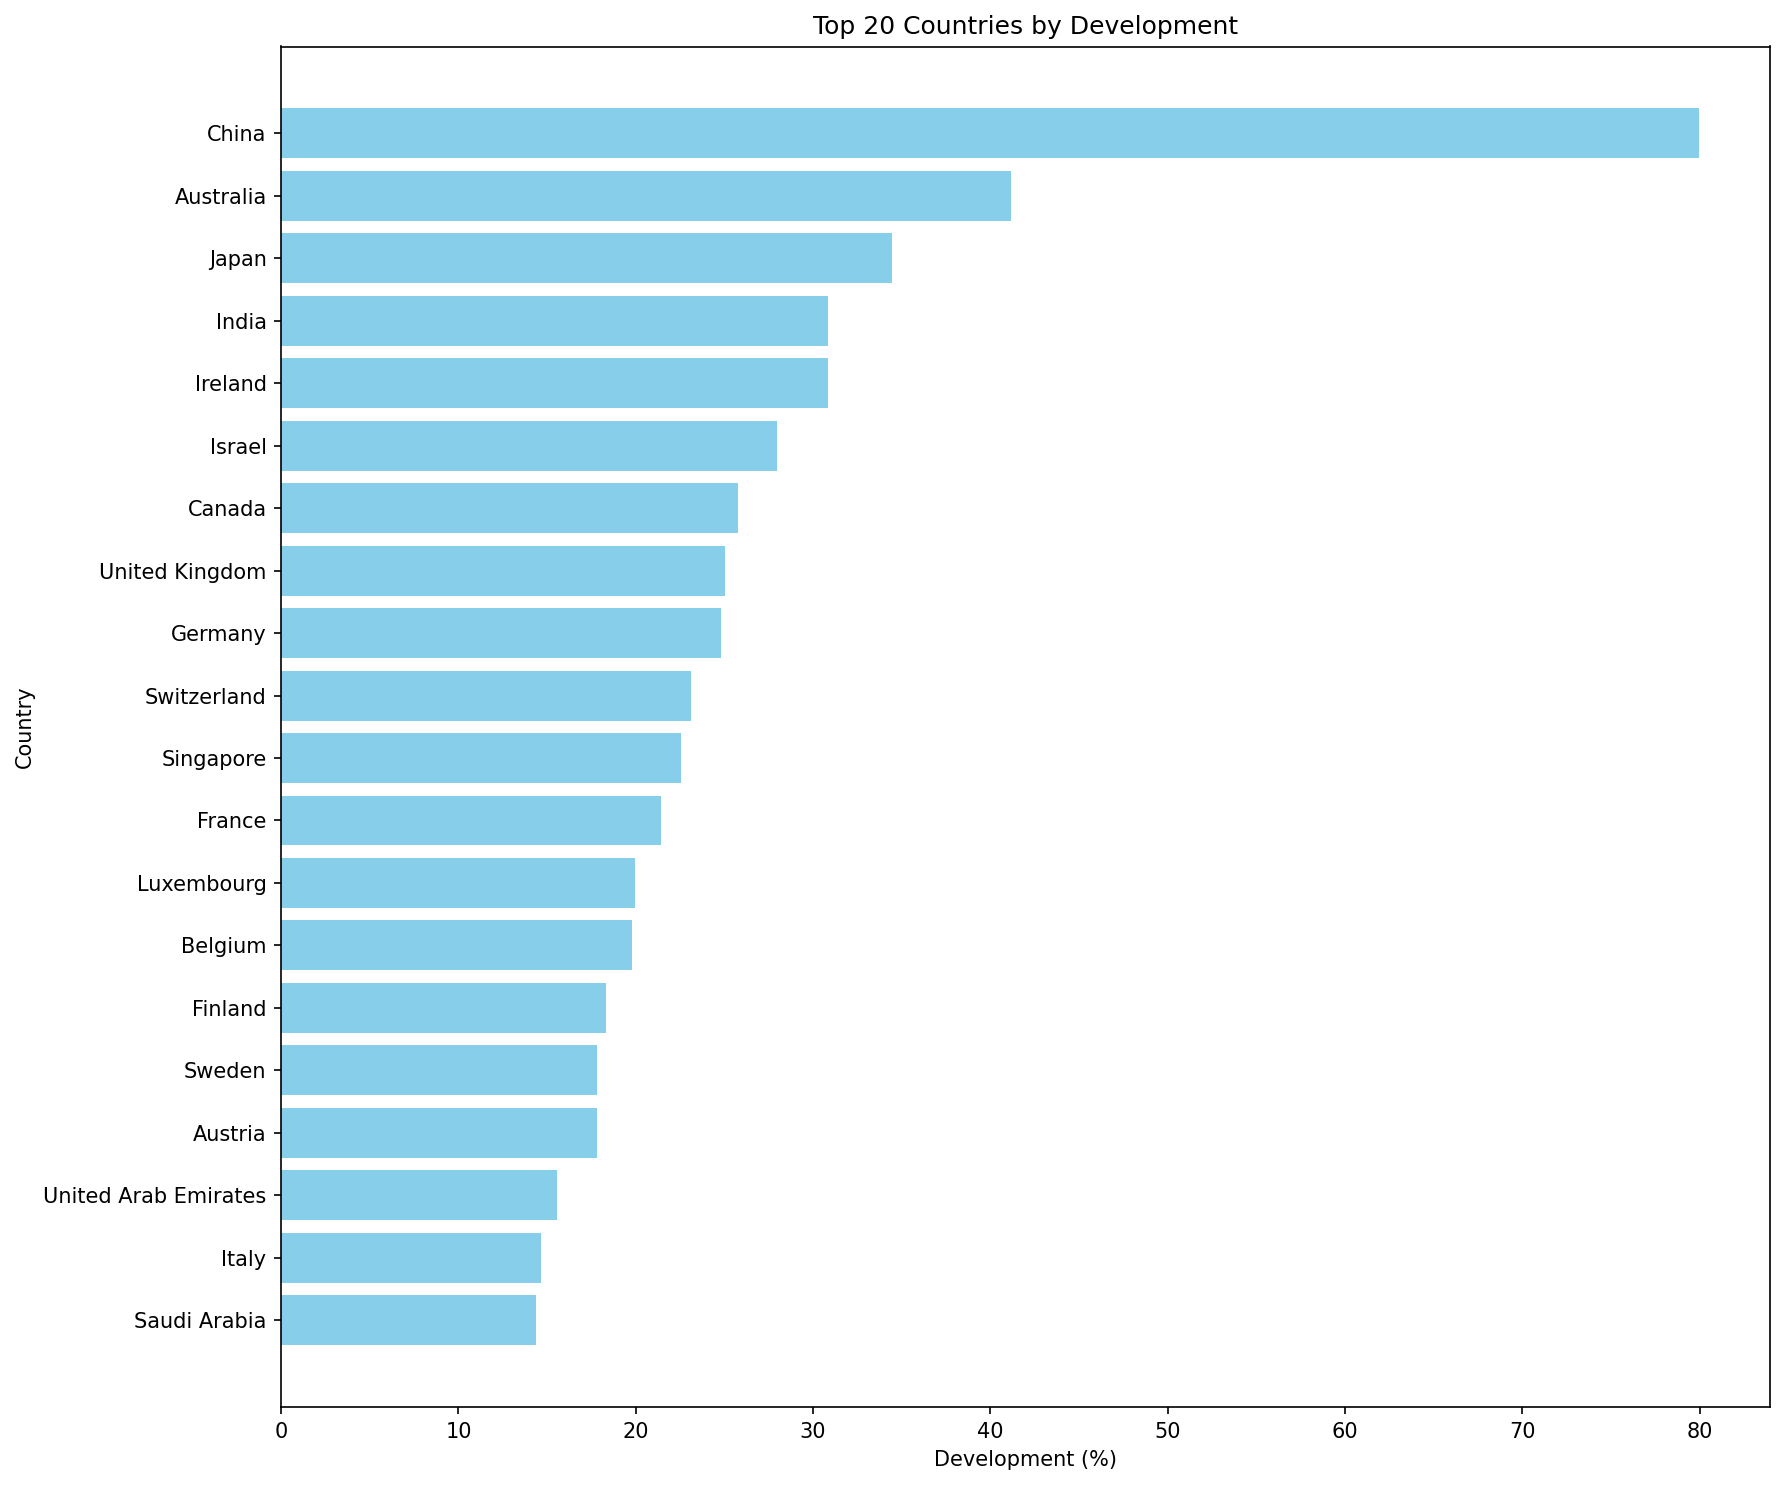

In [111]:
import matplotlib.pyplot as plt

# List of AI indicators
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']
color = 'skyblue'  # Define the same color for all bars

# Set DPI and figure size to make the window larger
dpi = 150  # Increase resolution
figsize = (12, 10)  # Increase figure size to make the window bigger

# Loop through each AI indicator and plot the top 20 countries
for column in ai_columns:
    # Sort countries by the current AI indicator and select the top 20
    top_20_countries_ai = merged_data.sort_values(by=column, ascending=False).head(20)
    
    # Create the bar chart with adjusted figure size and resolution
    plt.figure(figsize=figsize, dpi=dpi)
    plt.barh(top_20_countries_ai['Country'], top_20_countries_ai[column], color=color)
    
    # Add labels and title
    plt.xlabel(f'{column} (%)')
    plt.ylabel('Country')
    plt.title(f'Top 20 Countries by {column}')
    
    # Invert y-axis to show the highest values at the top
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

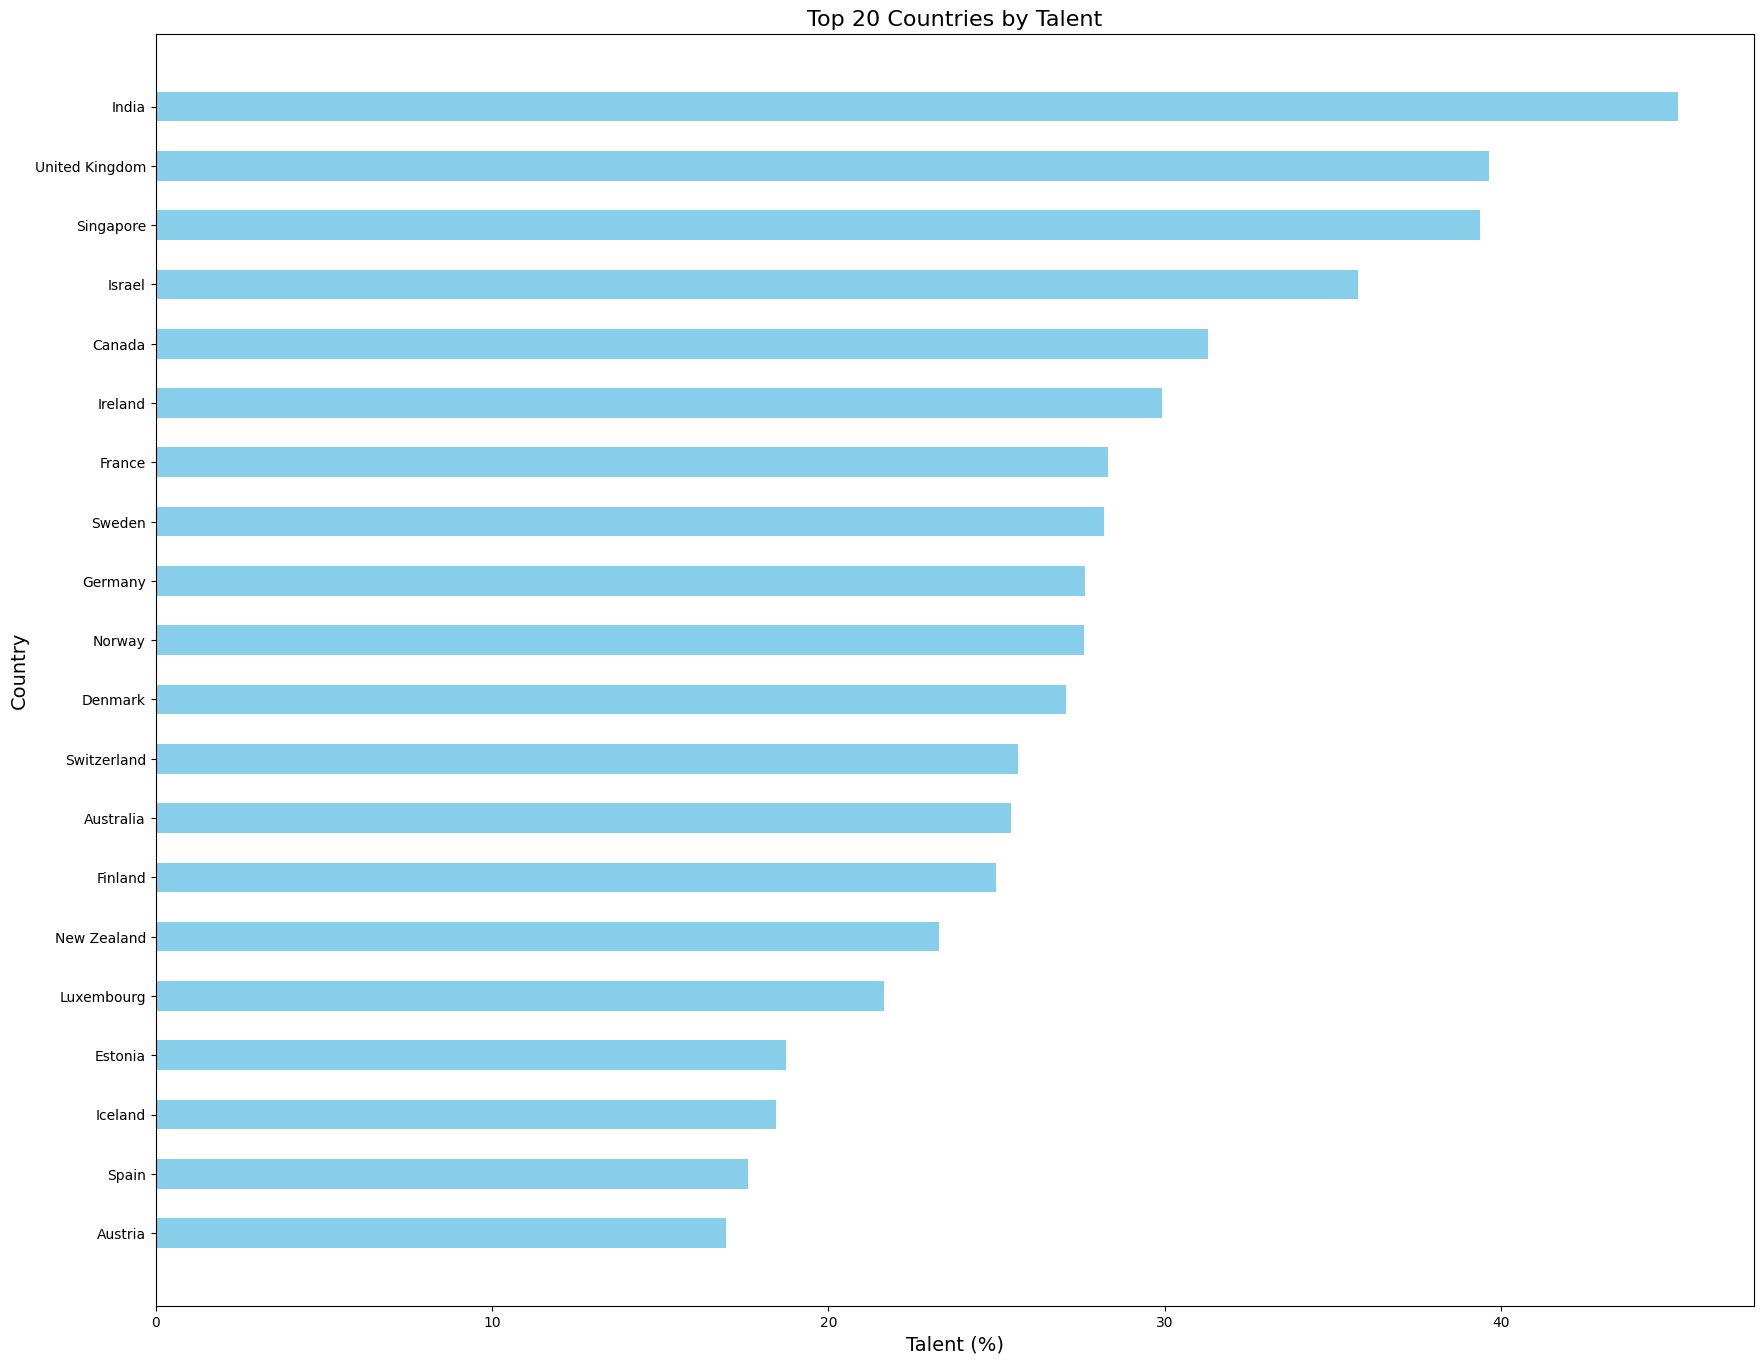

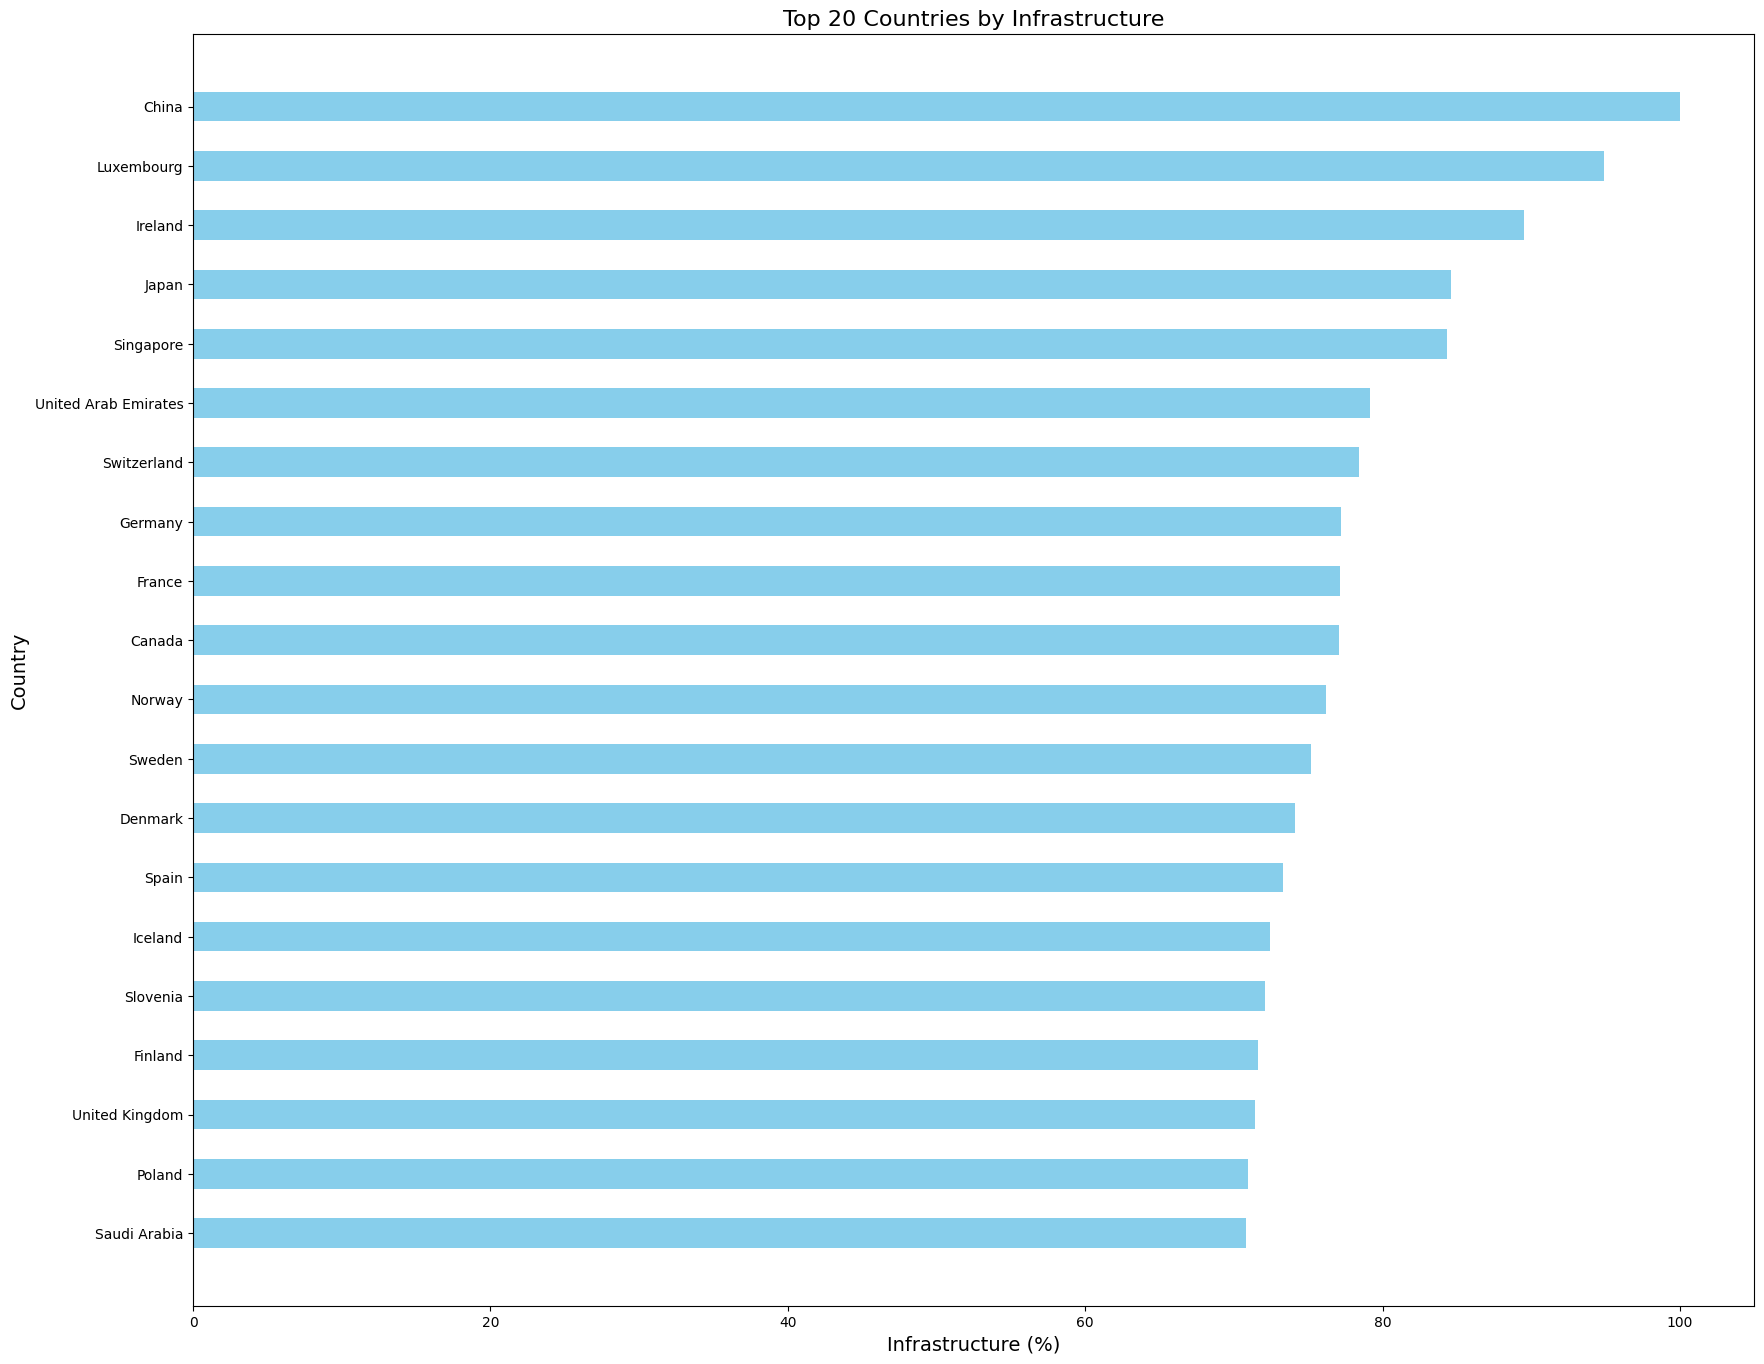

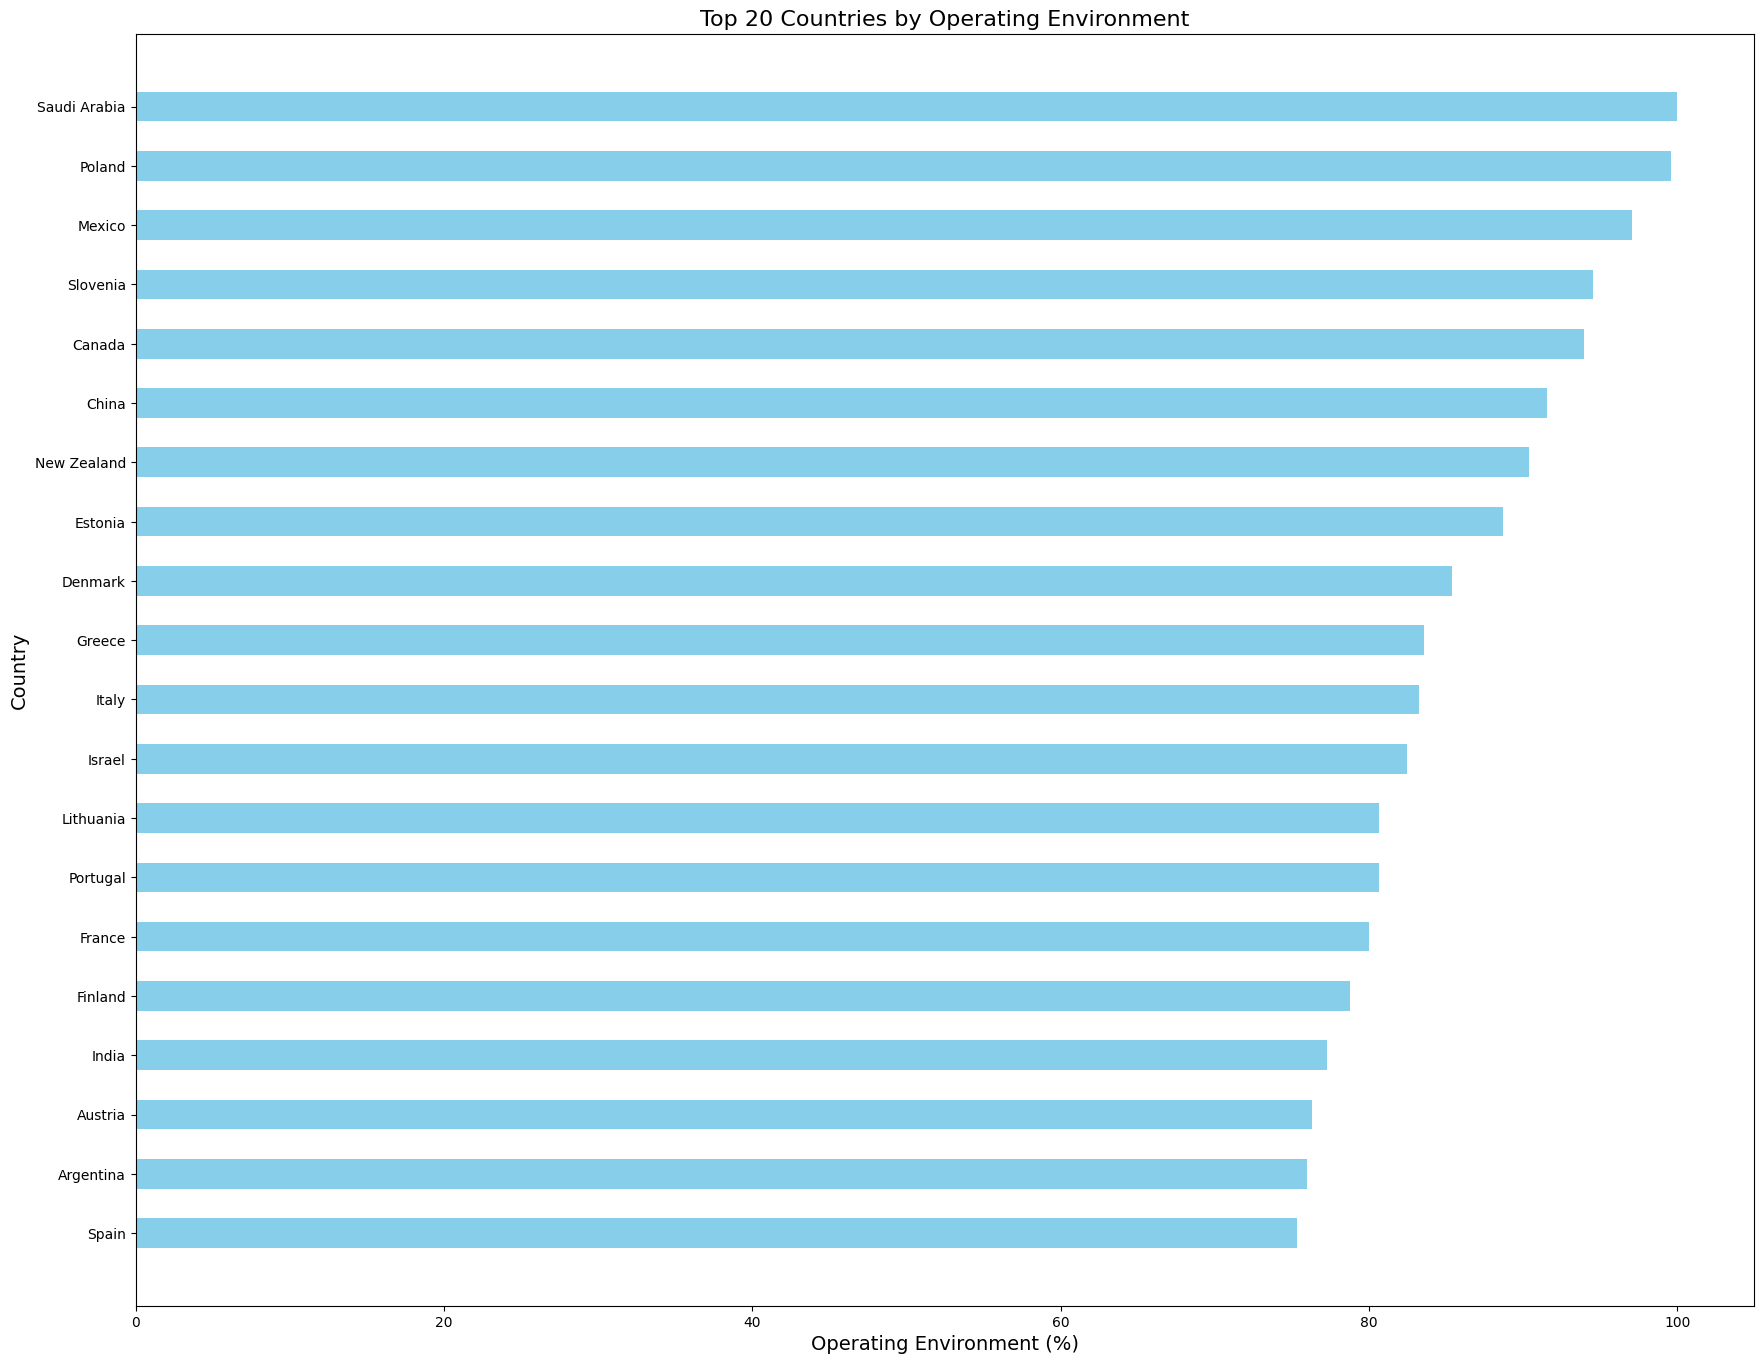

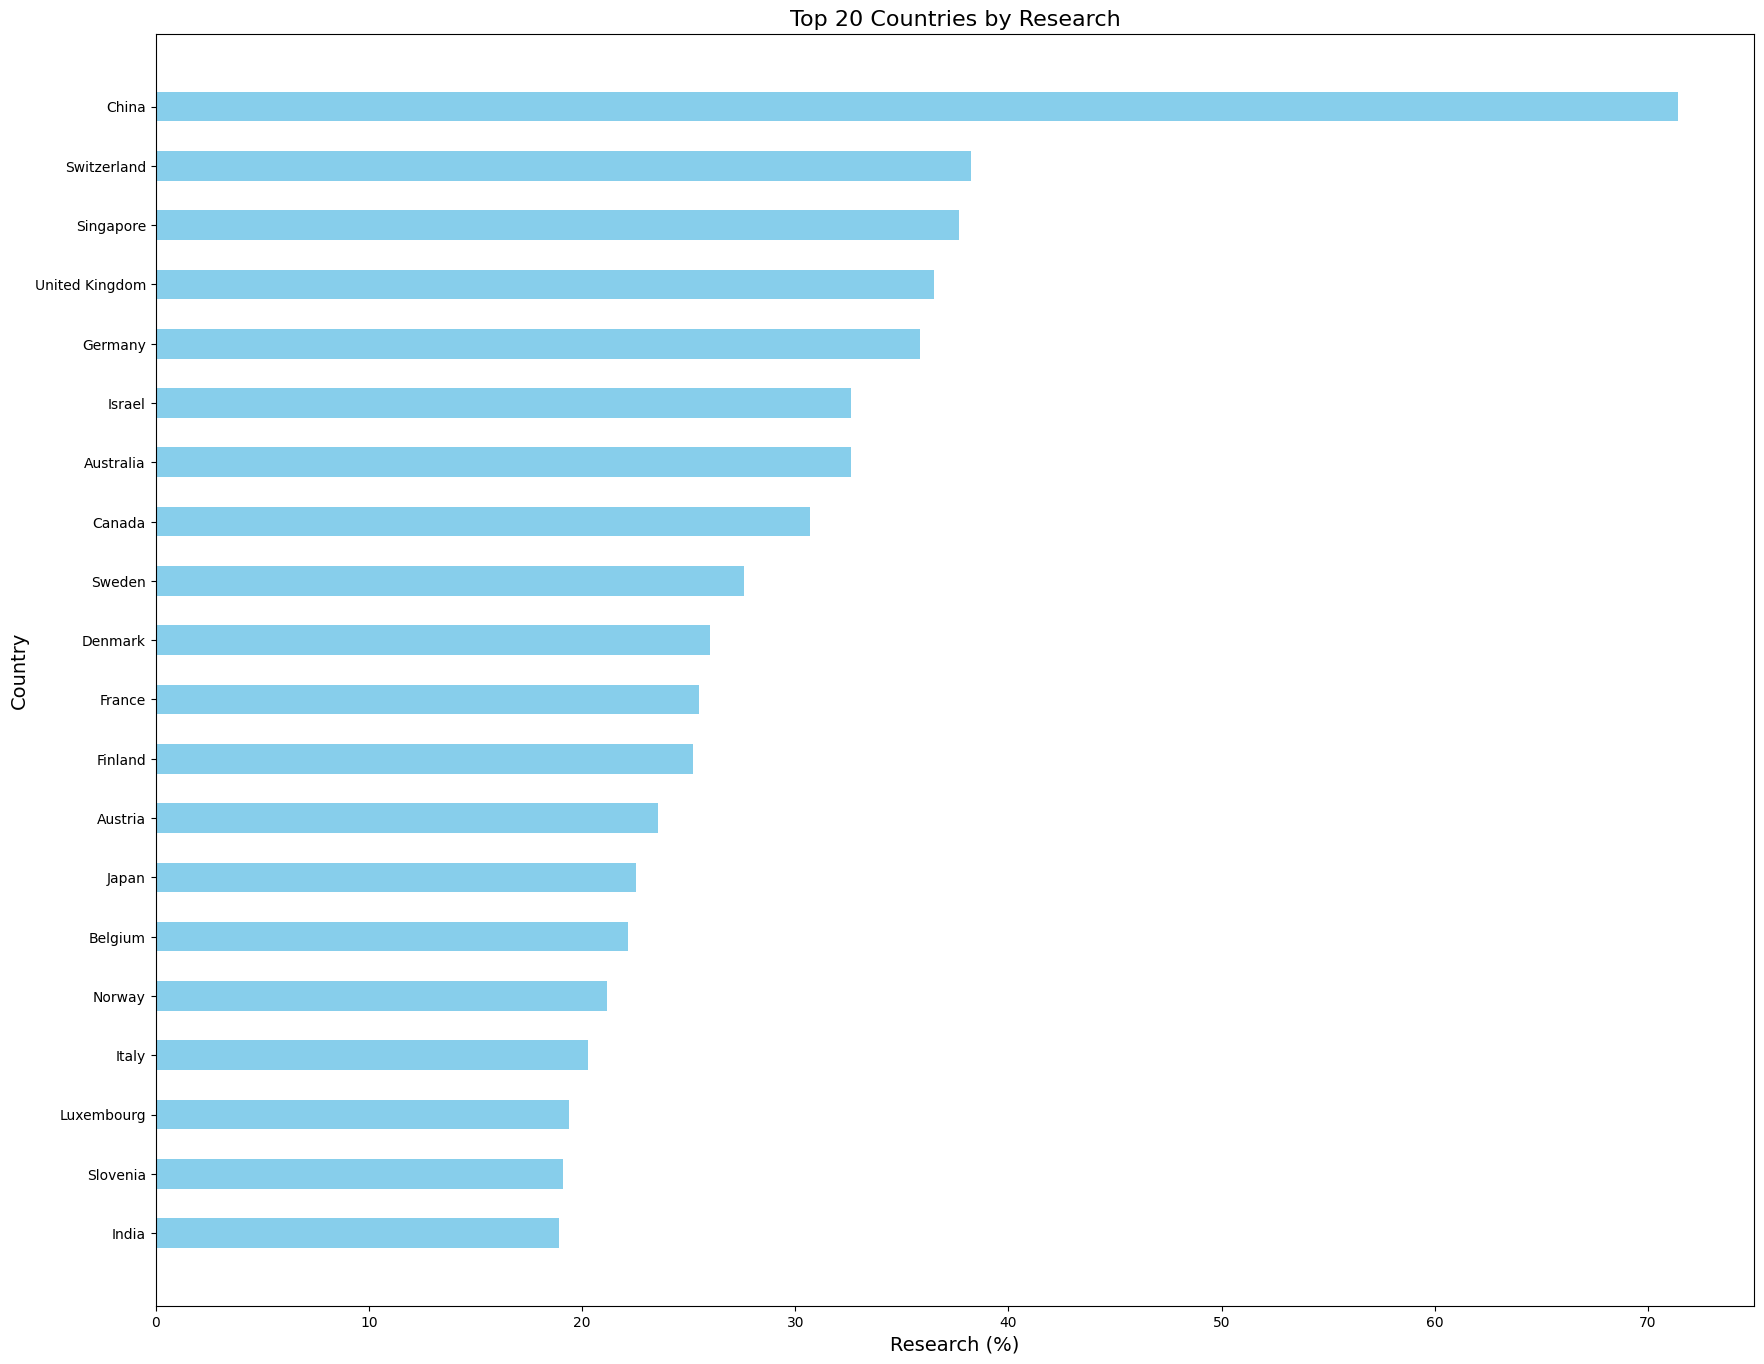

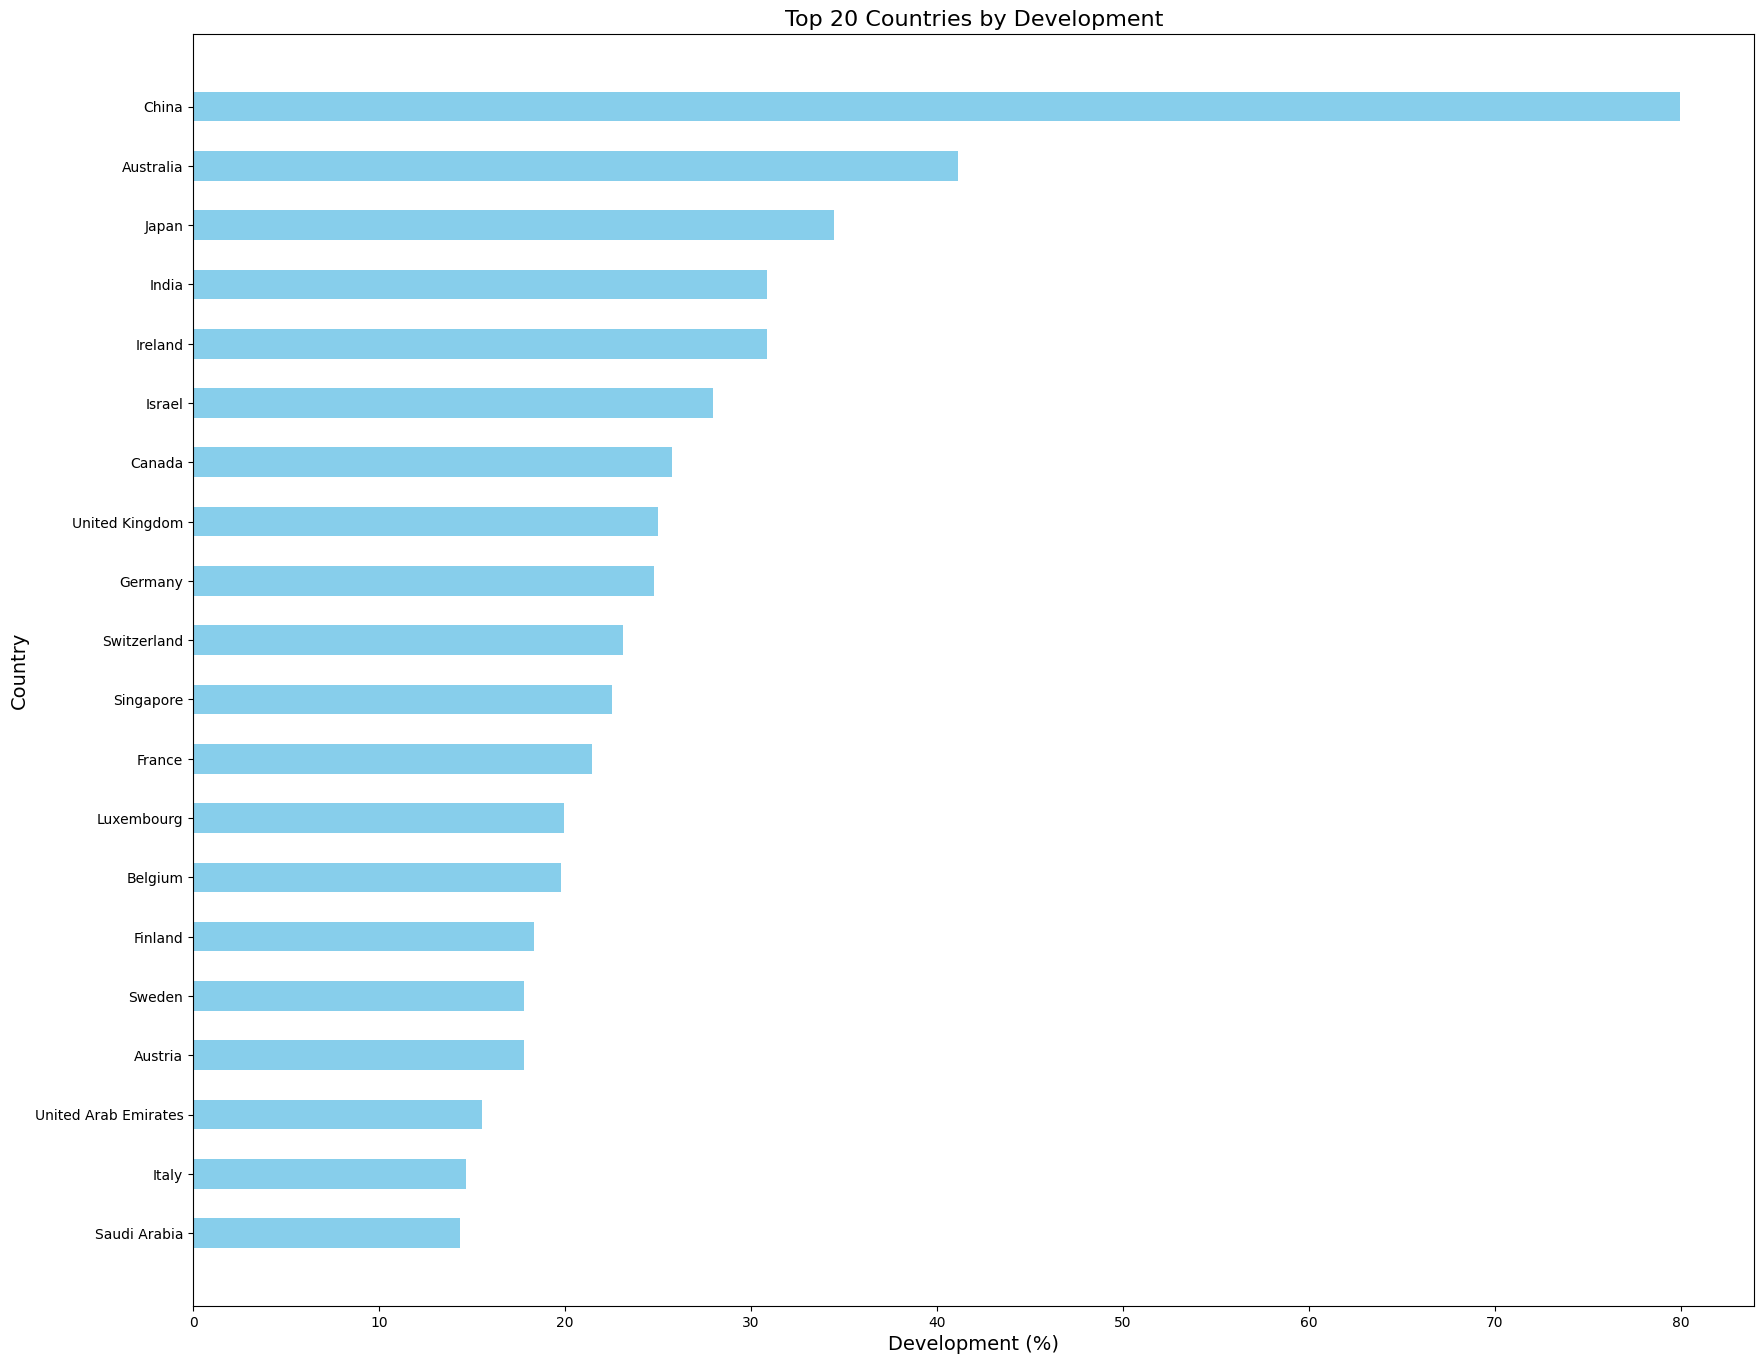

In [113]:
import matplotlib.pyplot as plt

# List of AI indicators
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']
color = 'skyblue'  # Define the same color for all bars

# Increase DPI for better resolution and adjust figure size
dpi = 100  # You can adjust this based on your needs
figsize = (18, 14)  # Larger window size

# Loop through each AI indicator and plot the top 20 countries
for column in ai_columns:
    # Sort countries by the current AI indicator and select the top 20
    top_20_countries_ai = merged_data.sort_values(by=column, ascending=False).head(20)
    
    # Create the bar chart with smaller bars and a larger window
    plt.figure(figsize=figsize, dpi=dpi)
    plt.barh(top_20_countries_ai['Country'], top_20_countries_ai[column], color=color, height=0.5)  # Reduce bar height
    
    # Add labels and title
    plt.xlabel(f'{column} (%)', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.title(f'Top 20 Countries by {column}', fontsize=16)
    
    # Invert y-axis to show the highest values at the top
    plt.gca().invert_yaxis()
    
    # Set layout to fit within the larger window
    plt.tight_layout(pad=2.0)
    
    # Display the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# List of AI indicators
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']
color = 'skyblue'  # Define the same color for all bars

# Increase DPI for better resolution and adjust figure size
dpi = 150  # Higher DPI for better image quality
figsize = (12, 8)  # Adjust figure size for saved image

# Loop through each AI indicator and plot the top 20 countries
for column in ai_columns:
    # Sort countries by the current AI indicator and select the top 20
    top_20_countries_ai = merged_data.sort_values(by=column, ascending=False).head(20)
    
    # Create the bar chart with adjusted figure size and resolution
    plt.figure(figsize=figsize, dpi=dpi)
    plt.barh(top_20_countries_ai['Country'], top_20_countries_ai[column], color=color, height=0.5)  # Smaller bars
    
    # Add labels and title
    plt.xlabel(f'{column} (%)', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.title(f'Top 20 Countries by {column}', fontsize=16)
    
    # Invert y-axis to show the highest values at the top
    plt.gca().invert_yaxis()
    
    # Set layout to avoid overlap and adjust for saving
    plt.tight_layout()
    
    # Save the plot as a PNG file (change the path if needed)
    plt.savefig(f'top_20_countries_by_{column}.png', format='png', bbox_inches='tight')
    
    # Optionally display the plot
    plt.show()

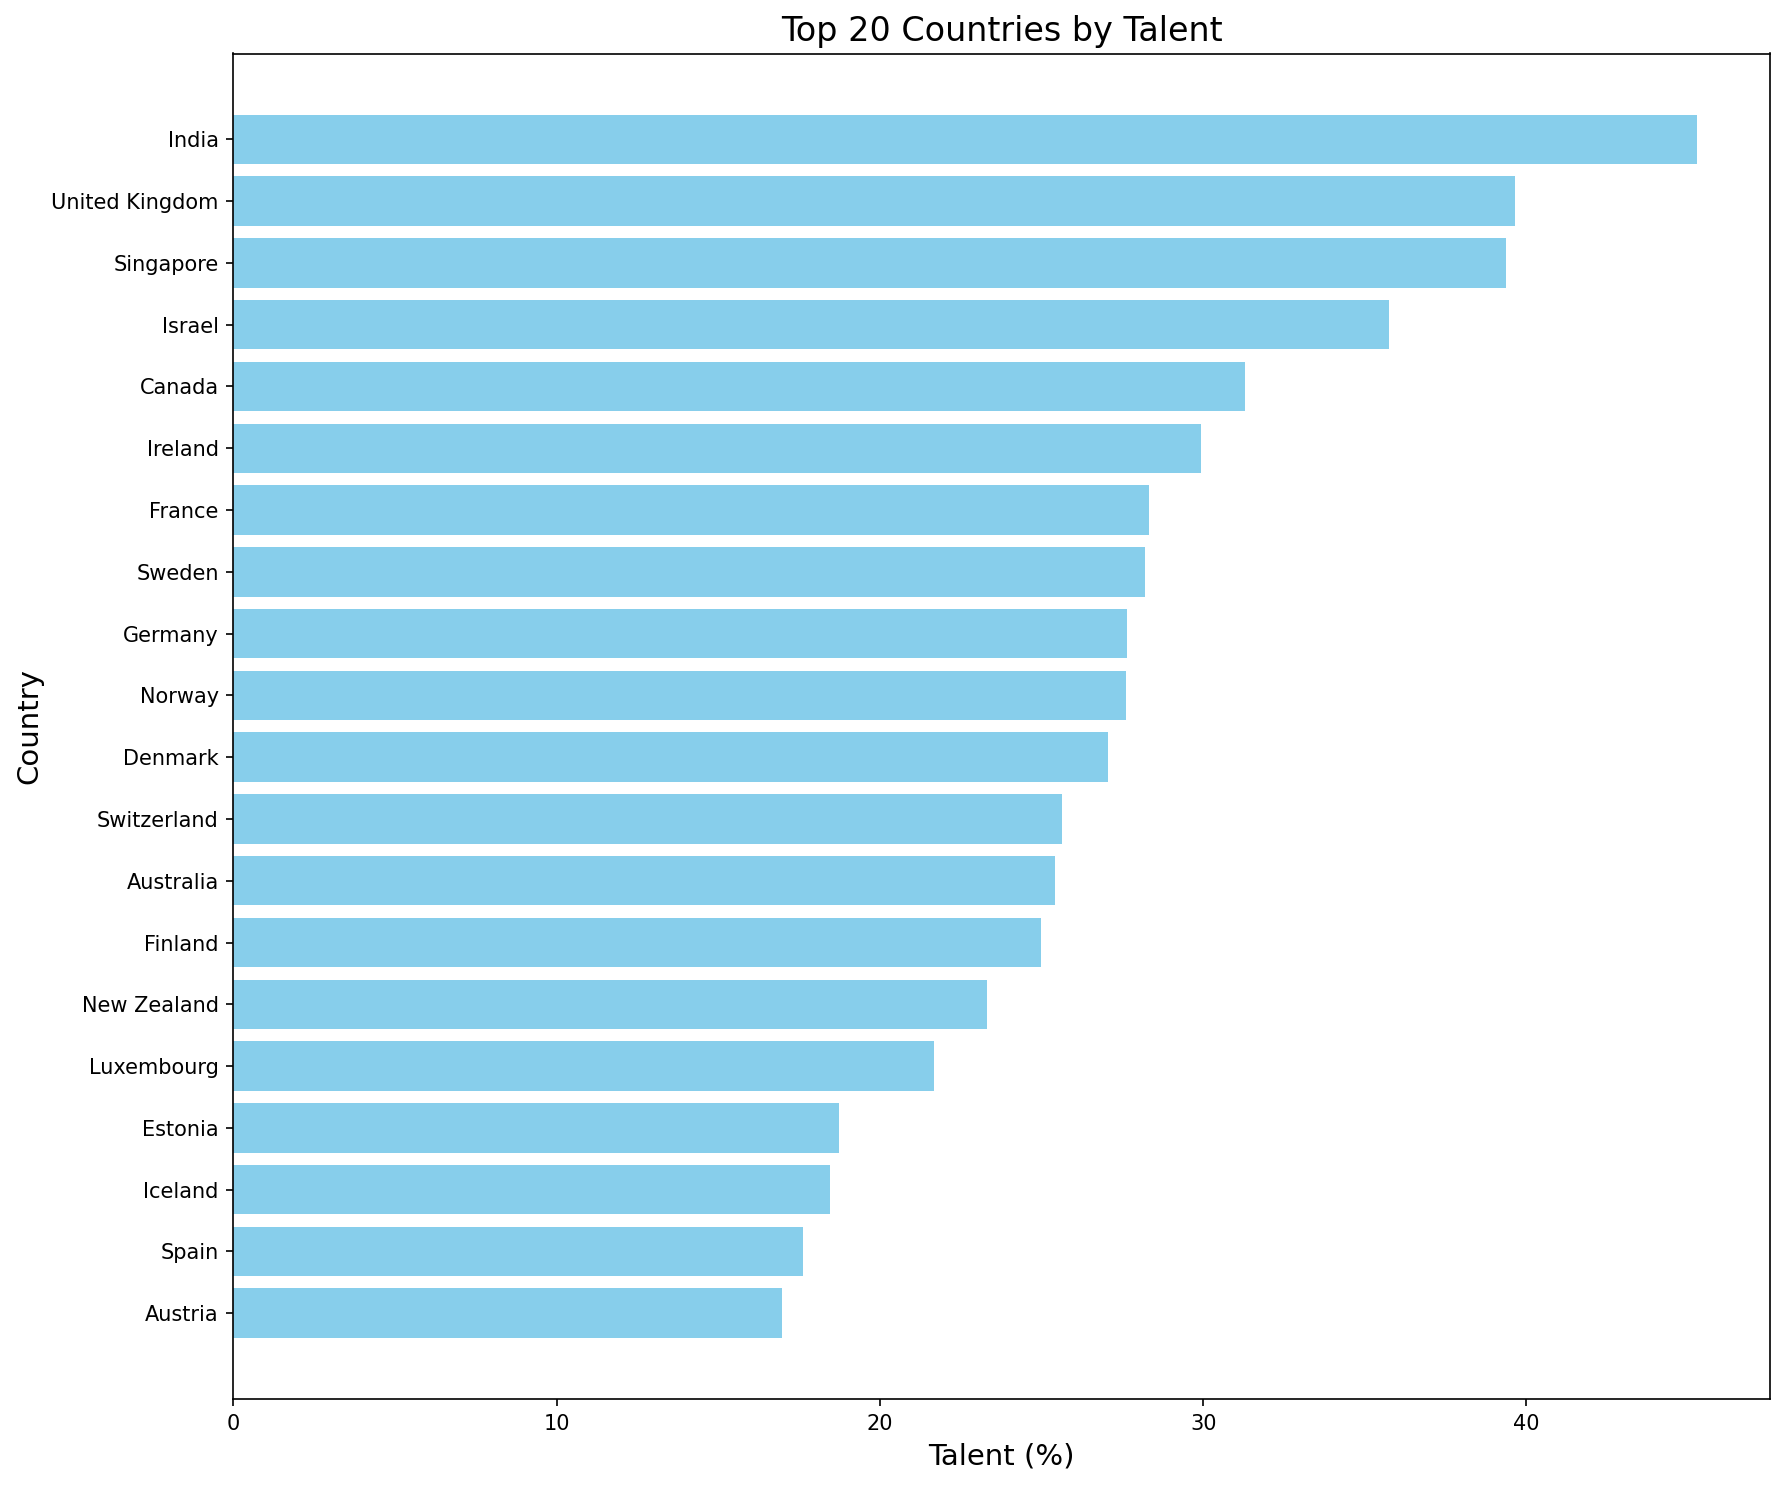

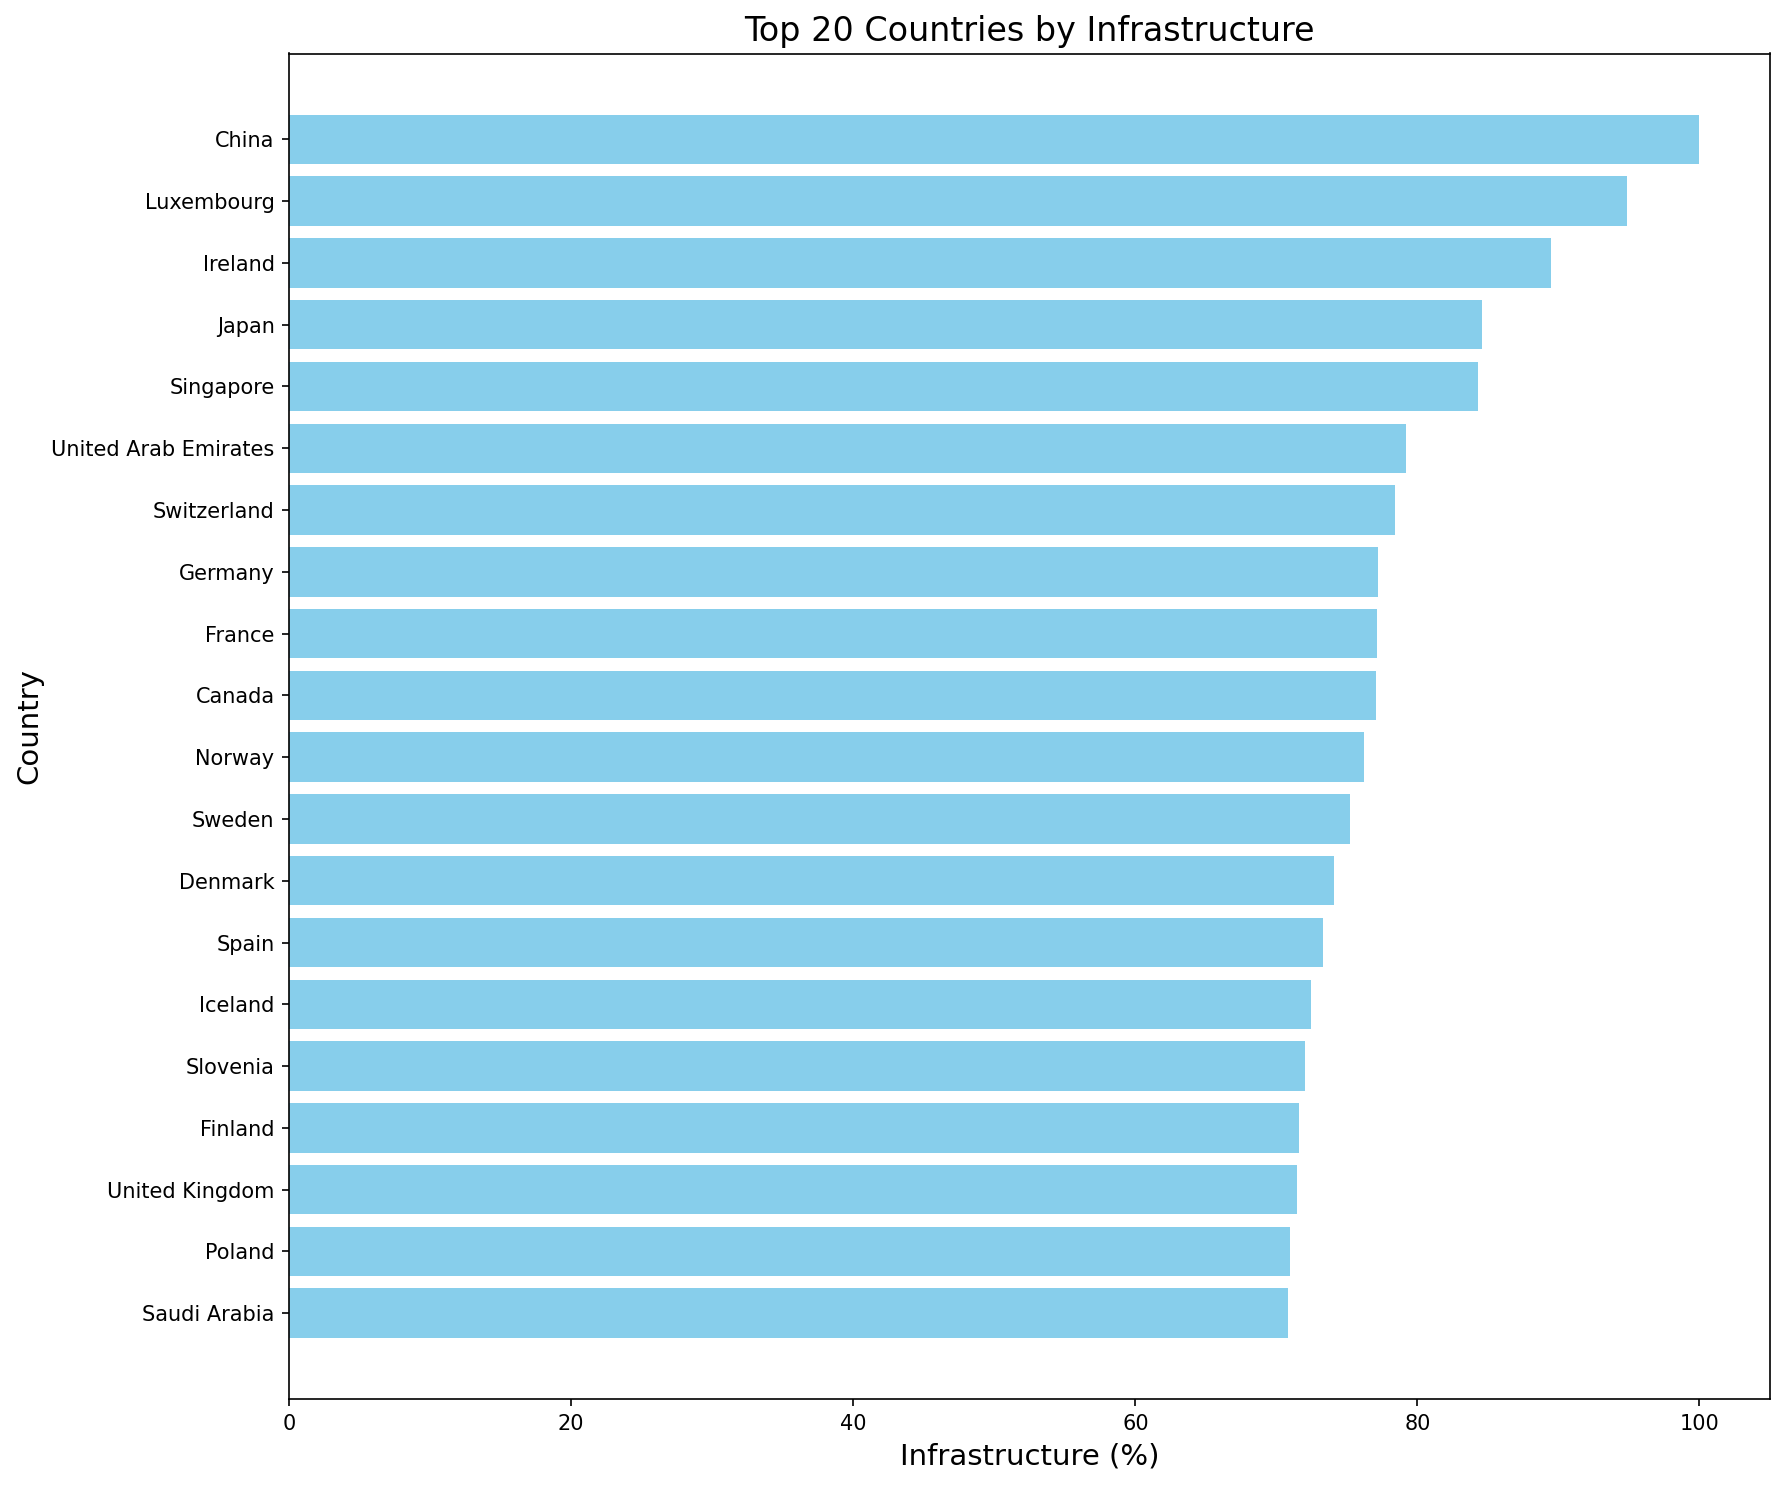

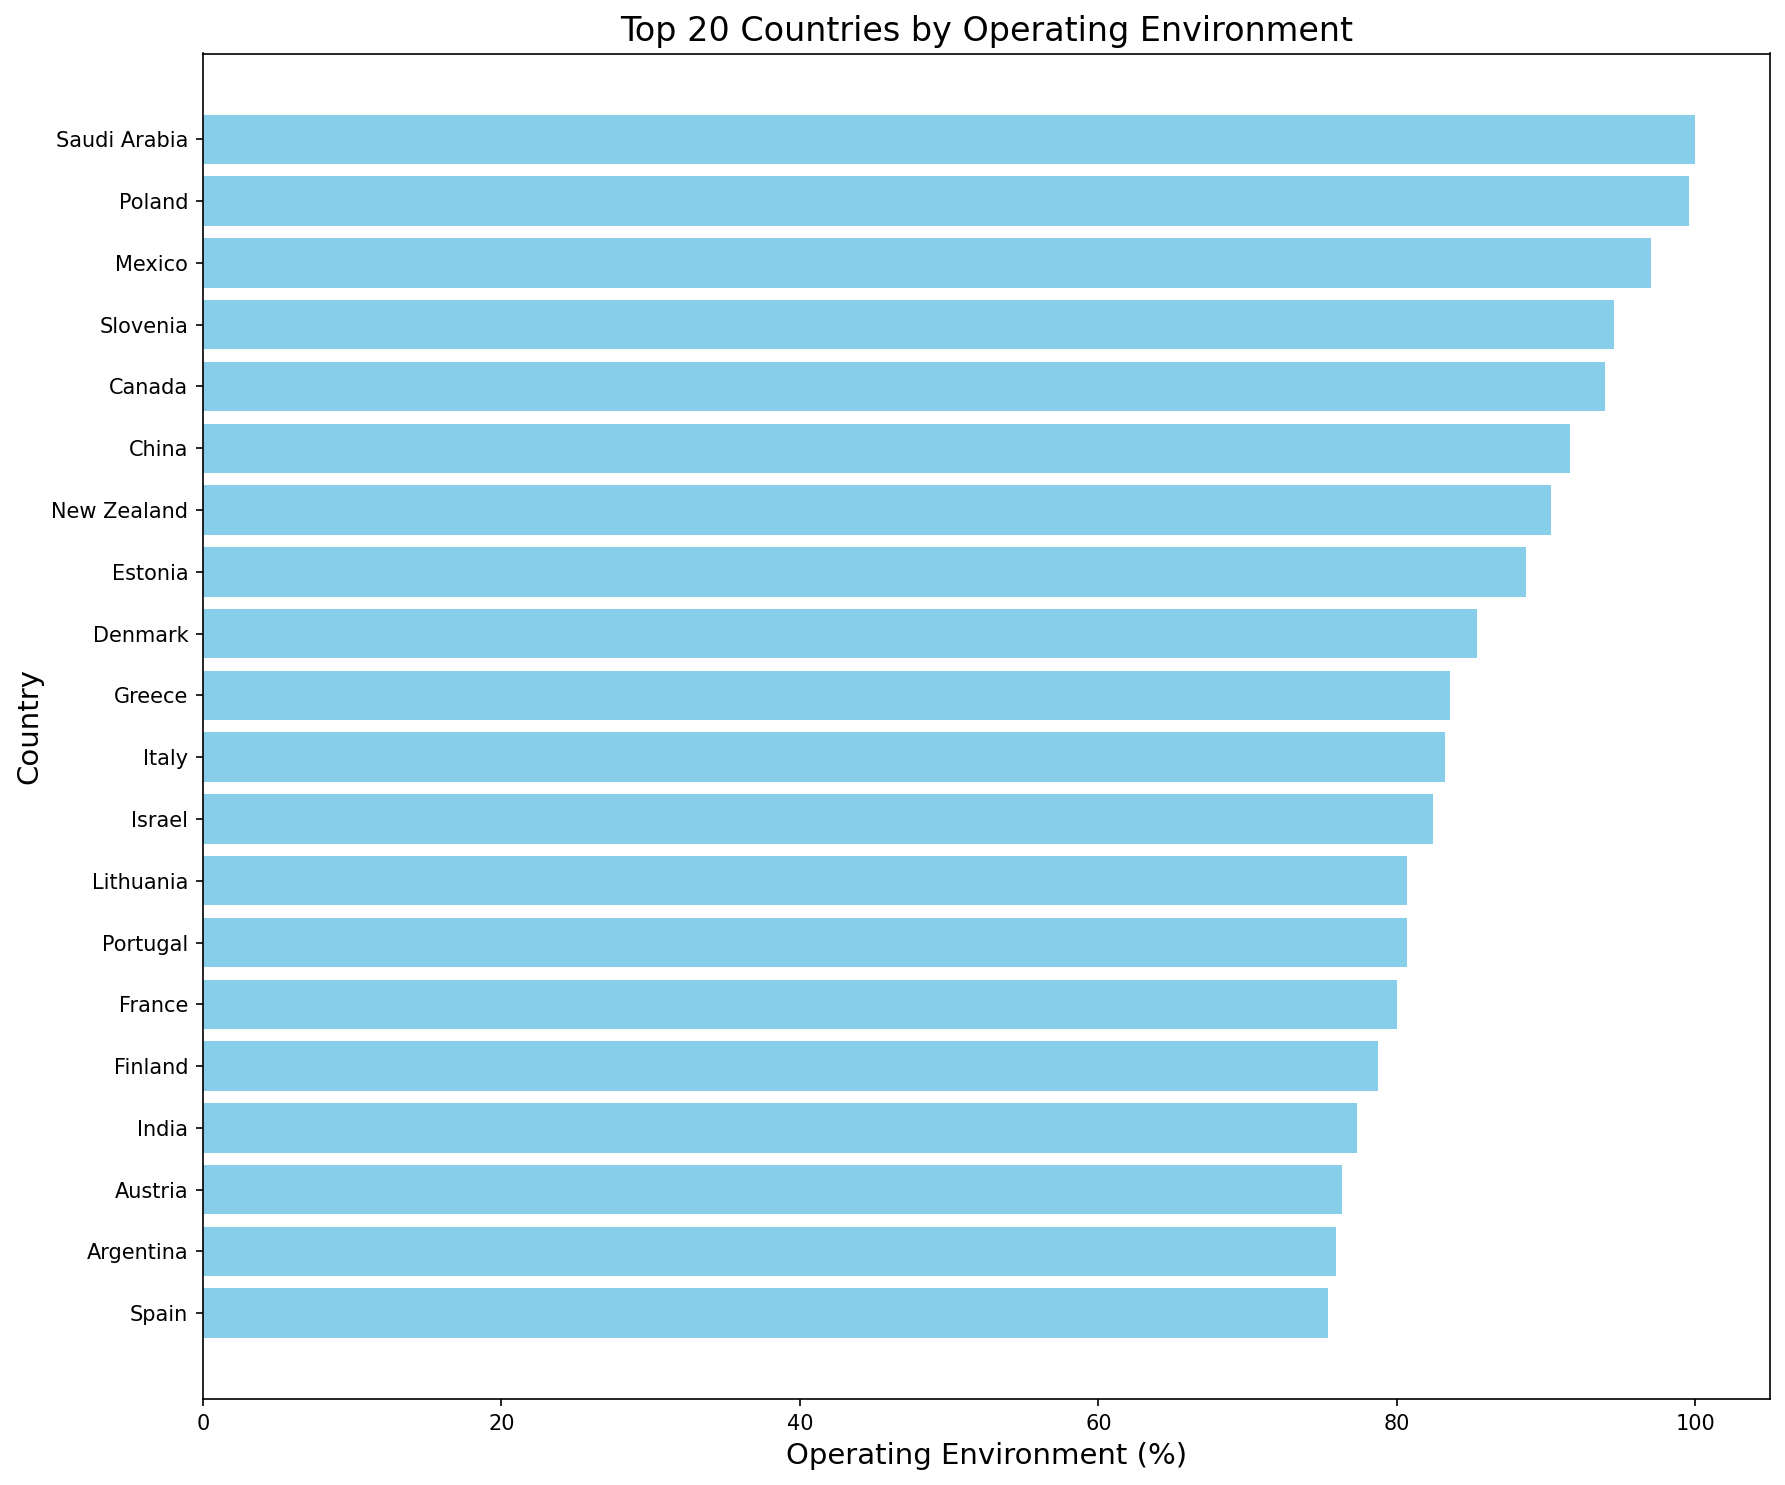

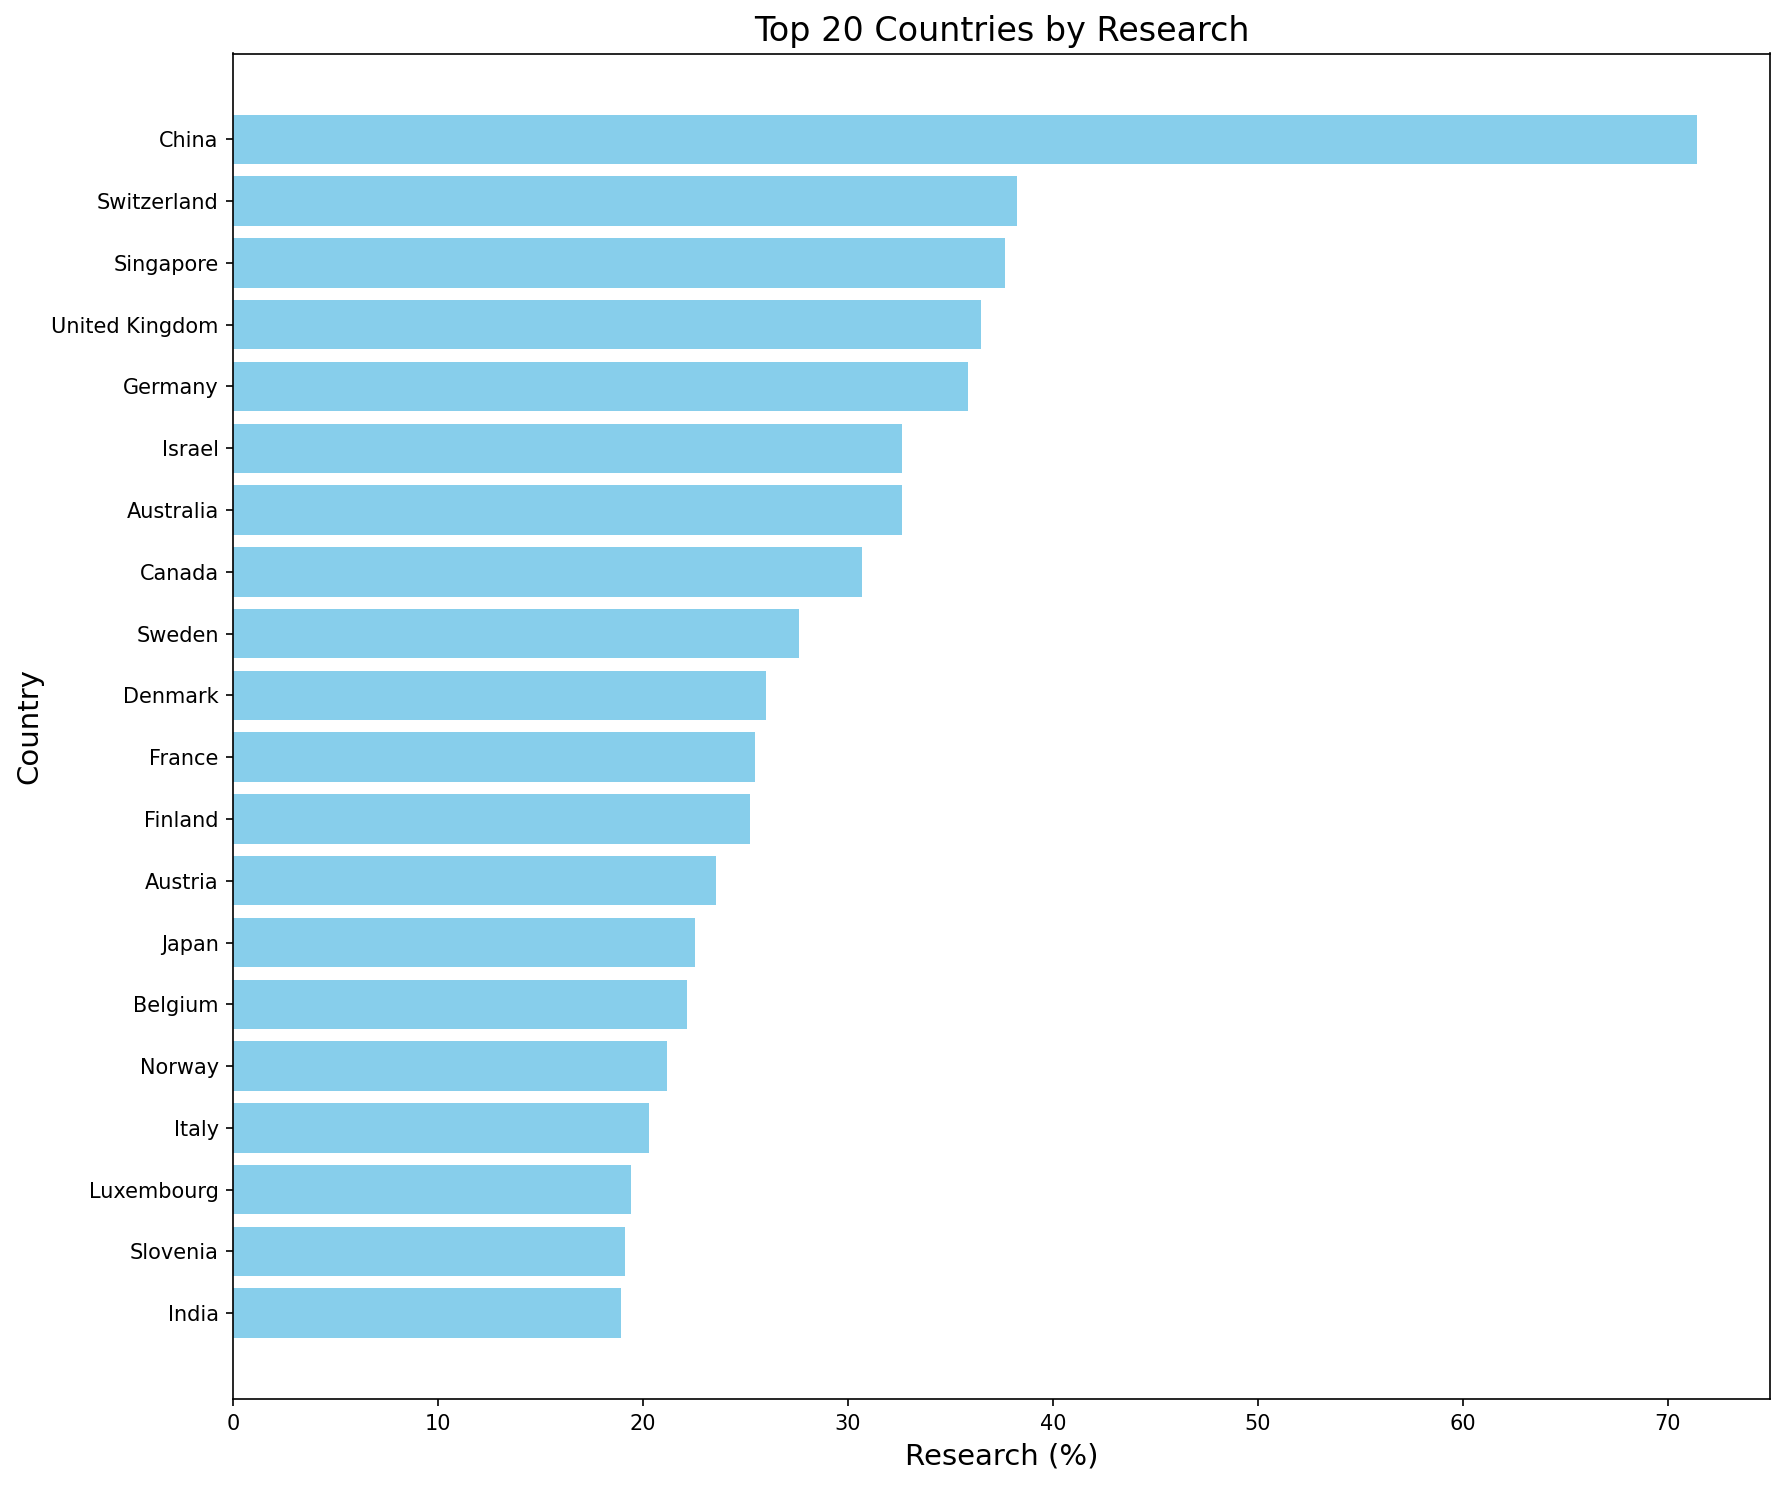

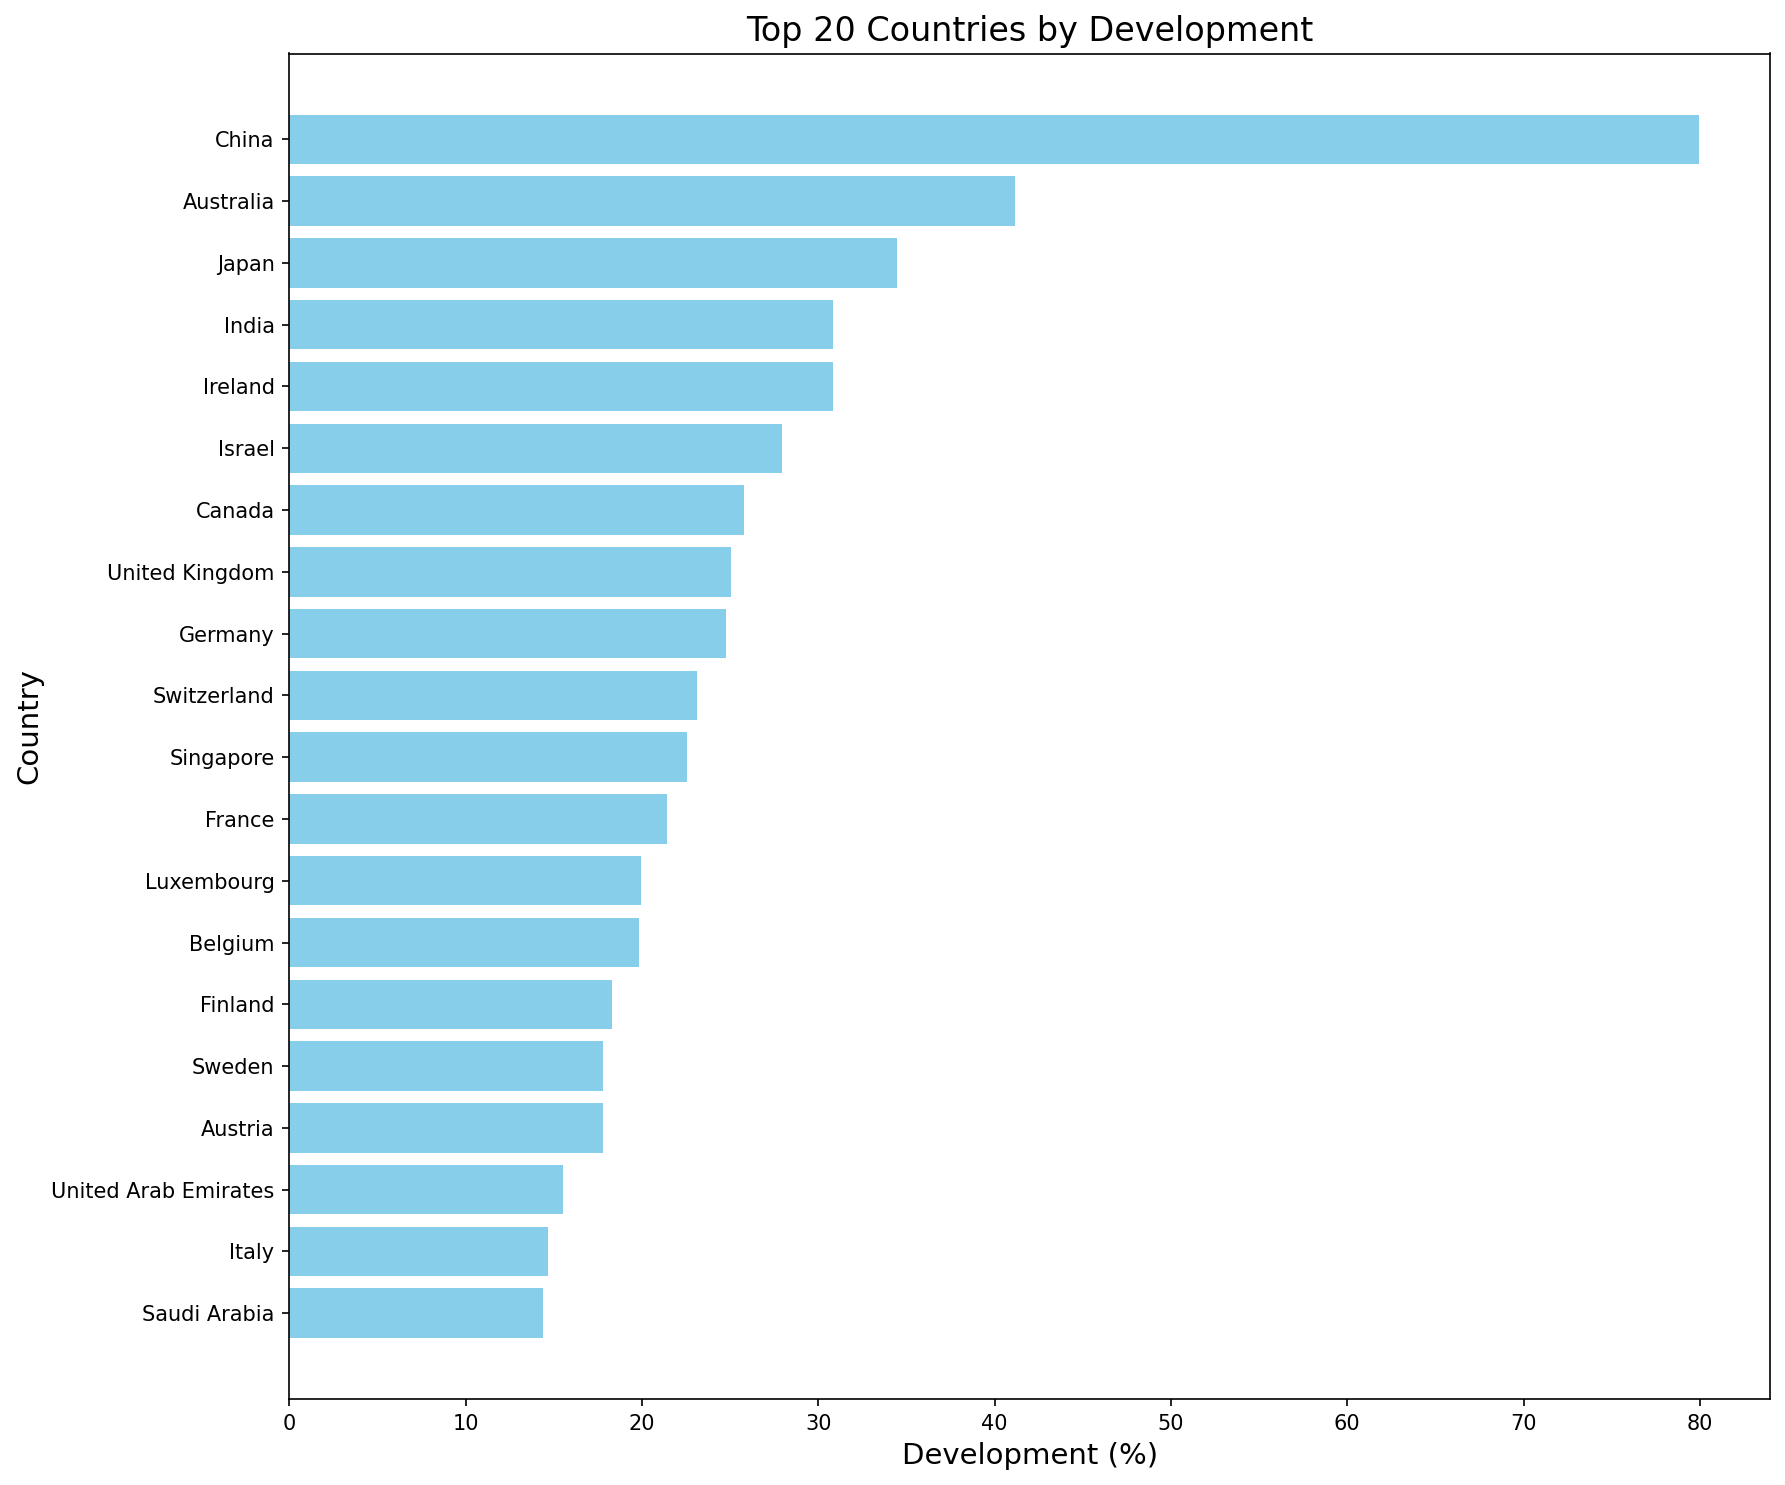

In [115]:
import matplotlib.pyplot as plt

# List of AI indicators
ai_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development']
color = 'skyblue'  # Define the same color for all bars

# Set DPI and figure size to make the window larger
dpi = 150  # Increase resolution
figsize = (12, 10)  # Increase figure size to make the window bigger

# Loop through each AI indicator and plot the top 20 countries
for column in ai_columns:
    # Sort countries by the current AI indicator and select the top 20
    top_20_countries_ai = merged_data.sort_values(by=column, ascending=False).head(20)
    
    # Create the bar chart with adjusted figure size and resolution
    plt.figure(figsize=figsize, dpi=dpi)
    plt.barh(top_20_countries_ai['Country'], top_20_countries_ai[column], color=color)
    
    # Add labels and title with the desired font size
    plt.xlabel(f'{column} (%)', fontsize=14)  # Font size set to 14
    plt.ylabel('Country', fontsize=14)  # Font size set to 14
    plt.title(f'Top 20 Countries by {column}', fontsize=16)  # Font size set to 16
    
    # Invert y-axis to show the highest values at the top
    plt.gca().invert_yaxis()
    
    # Ensure tight layout to prevent clipping
    plt.tight_layout()
    
    # Save the plot as a PNG file (change the path if needed)
    plt.savefig(f'top_20_countries_by_{column}.png', format='png', bbox_inches='tight')
    
    # Optionally display the plot
    plt.show()